# Customer Segmentation using K means clustering
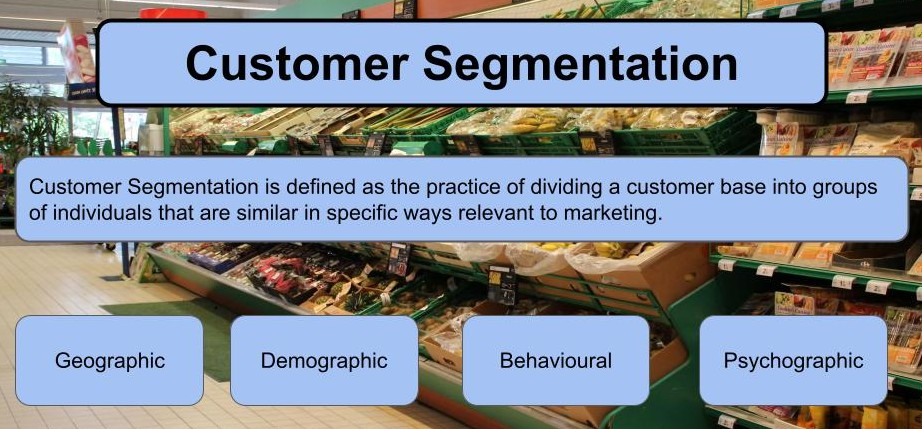
## Cluster customers with similar shopping habits into K clusters


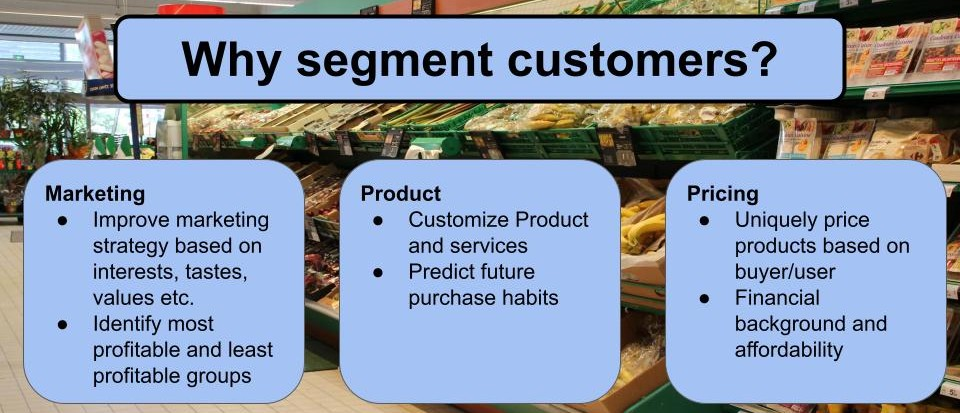

# Importing Libraries

In [412]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
#formatting
from colorama import Fore, Style
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.preprocessing import OrdinalEncoder
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
#Set limit for dataframe viewing
pd.option_context("display.max_columns", None)
sns.set(font_scale = 2)

# Loading the Dataset

In [413]:
#Read csv file
df = pd.read_csv('marketing_campaign.csv', sep = "\t")

#View the Dataframe
display(df.head())

#Size of dataset
print(Style.BRIGHT + "Shape of Dataframe:",df.shape[0],"samples and",df.shape[1],"features")

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

Shape of Dataframe: 2240 samples and 29 features


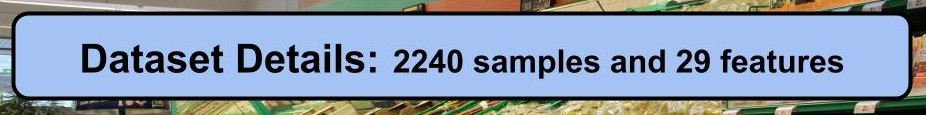

## Customer details:
- ID: Customer's unique identifier.
- Year_Birth: Customer's birth year.
- Education: Customer's education level.
- Marital_Status: Customer's marital status.
- Income: Customer's yearly household income.
- Kidhome: Number of children in customer's household.
- Teenhome: Number of teenagers in customer's household.
- Dt_Customer: Date of customer's enrollment with the company.
- Recency: Number of days since customer's last purchase.
- Complain: 1 if customer complained in the last 2 years, 0 otherwise.
- Z_CostContact      
- Z_Revenue          


## Product details:
- MntWines: Amount spent on wine in last 2 years.
- MntFruits: Amount spent on fruits in last 2 years.
- MntMeatProducts: Amount spent on meat in last 2 years.
- MntFishProducts: Amount spent on fish in last 2 years.
- MntSweetProducts: Amount spent on sweets in last 2 years.
- MntGoldProds: Amount spent on gold in last 2 years.

## Promotional info:
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise.
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise.
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise.
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise.
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise.
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise.

## Place of purchase:
- NumDealsPurchases: Number of purchases made with a discount.
- NumWebPurchases: Number of purchases made through the company’s web site.
- NumCatalogPurchases: Number of purchases made using a catalogue.
- NumStorePurchases: Number of purchases made directly in stores.
- NumWebVisitsMonth: Number of visits to company’s web site in the last month.


# Exploratory Data Analysis and Feature Engineering
1. Drop missing values from the dataframe
2. Parse Dt_customer as date time column
3. Create column to convert Dt_Customer to a numerical feature that define how long the customers have been part of the organization
4. Explore categorical features (checking for spelling and redundancies)
5. Marital_Status columns has several unique value that correspond to similar living situation, we can reduce the number to which families live together which affects their shopping figures
6. Redefine Education level to simpler and more clear terms
7. Create column to convert Year_Birth into a numerical column of age so it can be used in the model
8. Create column that adds the amount spent on different products to total spent amount by each customer
9. Rename the product columns for clarity
10. Create column to calculate number of children in the house, (teen + kids)
11. Create column to define family size 
12. Create column to identify if the customer is a parent or not.

In [414]:
#Get information on the dataset
print(df.info())

print('Summary Of The Dataset :')
display(df.describe())
display(df.describe(include = object))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000      2240.000000   
mean     49.109375   303.935714    26.302232       166.950000   
std      28.962453   336.597393    39.773434       225.715373   
min       0.000000     0.000000     0.000000         0.000000   
25%      24.000000    23.750000     1.000000        16.000000   
50%      49.000000   173.500000     8.000000        67.000000   
75%      74.000000   504.250000    33.000000       232.000000   
max      99.000000  1493.000000   199.000000      1725.000000   

       MntFishProducts  ...  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
count      2240.000000  ...        2240.000000   2240.000000   2240.000000   
mean         37.525446  ...           5.316518      0.072768      0.074554   
std          54.628979  ...           2.426645      0.259813      0.262728   
min           0.000000  ...           0.000000      0.000000      0.000000   
25%           3.000000  ...           3.000000      0.000000      0.000000   
50%          12.000000  ...           6.000000      0.000000      0.000000   
75%          50.000000  ...           7.000000      0.000000      0.000000   
max         259.000000  ...          20.000000      1.000000      1.000000   

       AcceptedCmp5  AcceptedCmp1  AcceptedCmp2     Complain  Z_CostContact  \
count   2240.000000   2240.000000   2240.000000  2240.000000         2240.0   
mean       0.072768      0.064286      0.013393     0.009375            3.0   
std        0.259813      0.245316      0.114976     0.096391            0.0   
min        0.000000      0.000000      0.000000     0.000000            3.0   
25%        0.000000      0.000000      0.000000     0.000000            3.0   
50%        0.000000      0.000000      0.000000     0.000000            3.0   
75%        0.000000      0.000000      0.000000     0.000000            3.0   
max        1.000000      1.000000      1.000000     1.000000            3.0   

       Z_Revenue     Response  
count     2240.0  2240.000000  
mean        11.0     0.149107  
std          0.0     0.356274  
min         11.0     0.000000  
25%         11.0     0.000000  
50%         11.0     0.000000  
75%         11.0     0.000000  
max         11.0     1.000000  

[8 rows x 26 columns]

Education Marital_Status Dt_Customer
count         2240           2240        2240
unique           5              8         663
top     Graduation        Married  31-08-2012
freq          1127            864          12

### Features structure:
- 24 Numerical 
- 1 Date Time
- 2 Categorical

### Handle the following:
- The Dt_Customer column that defines when the customer joined needs to be parsed as date time 
- The Data contains missing values that need to be dealt with.

### Missing values 
We drop the rows that contain missing values as there is only a small number of these rows.

- Dt_customer column defines the date when the customer first joined the company.

- Next we are going to parse the Dt_customer column to date time and find the oldest and newest customer based on how long they have been with the company.

### Newest and Oldest customers

- This date time feature can be converted to a numeric column that will give us details about the customers such as how long they have been part of the organization.
- This feature can contribute to the loyalty/recency metric of the customer and helpd us better cluster similar customers.

### Customer for how many days
- For how long customer has been with the company can be calculated from the date they joined to the last date stored in the data

### Create Age column
- Age of customer from Year_Birth

### Categorical Features
- Marital_Status
- Education

### Transforming categorical features
- Reduce number of unique values in Marital_Status to define the living sitaution.
- Change Graduation to clearer terms

### Total_Amt_Spent
- Total amount spent by the customer calculated by summing amount spend on all products

### Rename product columns for clarity

### Total_Cmp_Response
- How many campaigns did the customer respond to in total

### Total_Num_Purchases 
- Sum the number of purchases made throught the various sources and the campaign deals

### Number of children
- total number of children in the house = kids + teen

### Family size
- partners + children

### Parent or not
- Is the customer a parent

In [415]:
#No of missing values for each column
print(df.isnull().sum()/len(df))

#One column Income contains a small ratio of missing values which can be dropped.
df.dropna(inplace = True)

#Check Missing values after dropping
print(Style.BRIGHT + "No of missing values left =", df.isnull().sum().sum())

#Shape of dataframe after removing missing values
print("Shape of Dataframe after removing missing values:",df.shape[0],"samples and",df.shape[1],"features")

#Parse date 
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

#Newest customers
print(Style.BRIGHT + "Record of newest customer/s that joined the company on", df['Dt_Customer'].max())
display(df[df['Dt_Customer'] == df['Dt_Customer'].max()])

#Oldest customers
print(Style.BRIGHT + "Record of oldest customers that joined the company on", df['Dt_Customer'].min())
display(df[df['Dt_Customer'] == df['Dt_Customer'].min()])

#Customer recency = last date of all records - date the custome joined the company
df['Customer_for_days'] = (df['Dt_Customer'].max() - df['Dt_Customer']).dt.days

#Drop redundant column
df.drop(columns = ['Dt_Customer'], inplace = True)

#Age = current year - Year_Birth
df['Age'] = 2021 - df['Year_Birth']

#Drop redundant column
df.drop(columns = ['Year_Birth'], inplace = True)

#Unique values and counts
print(Style.BRIGHT + "Marital_Status")
print(Style.RESET_ALL)
print(df['Marital_Status'].value_counts(),"\n")

print(Style.BRIGHT + "Education")
print(Style.RESET_ALL)
print(df['Education'].value_counts())

#Transforming to living status
df['Living_Status'] = df['Marital_Status'].replace({"Married":"Partner", 
                                                    "Together":"Partner",
                                                    "Single":"Alone",
                                                    "Divorced":"Alone",
                                                    "Widow":"Alone", 
                                                    "Absurd":"Alone", 
                                                    "YOLO":"Alone"})
#Education 
df['Education'] = df['Education'].replace({"Graduation":"Graduate",
                                           "PhD":"Postgraduate",
                                           "Master":"Postgraduate", 
                                           "2n Cycle":"Undergraduate",
                                          "Basic":"Undergraduate"})

#Drop redundant column
df.drop(columns = ['Marital_Status'], inplace = True)

#Unique values and counts
print("Unique values and Counts after transformation")
print(Style.BRIGHT + "Living_Status")
print(Style.RESET_ALL)
print(df['Living_Status'].value_counts(),"\n")

print(Style.BRIGHT + "Education")
print(Style.RESET_ALL)
print(df['Education'].value_counts())

#Add spending 
df['Total_Amt_Spent'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds'] 

#rename columns
df.rename(columns = {"MntWines": "Wines",
                     "MntFruits":"Fruits",
                     "MntMeatProducts":"Meat",
                     "MntFishProducts":"Fish",
                     "MntSweetProducts":"Sweets",
                     "MntGoldProds":"Gold"}, inplace = True)

#Total campaign response
df['Total_Cmp_Response'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5']

#Total number of purchases
df['Total_Num_Purchases'] = df['NumDealsPurchases'] + df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']

#Total number of children
df['Children'] = df['Kidhome'] + df['Teenhome']

#Parent or not
df['Is_Parent'] = np.where(df['Children']>0, 1, 0)

#Drop unnecessary column
df.drop(columns = ["ID"], inplace = True)

display(df)

ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 0.010714
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Z_CostContact          0.000000
Z_Revenue              0.000000
Response               0.000000
dtype: float64
No of missing values left = 0
Shape of Dataframe after re

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
2003  6679        1966  Graduation         Single  33279.0        0         0   

     Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
2003  2014-12-06       29        10  ...                  3             0   

      AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
2003             0             0             0             0         0   

      Z_CostContact  Z_Revenue  Response  
2003              3         11         0  

[1 rows x 29 columns]

Record of oldest customers that joined the company on 2012-01-08 00:00:00


ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
724    4692        1976  Graduation        Married   7500.0        1   
976    2611        1959      Master       Together  82576.0        0   
2029  10001        1985    2n Cycle       Together   7500.0        1   
2194   7118        1957  Graduation        Married  73803.0        0   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
724          0  2012-01-08       19         7  ...                  9   
976          0  2012-01-08       66      1206  ...                  1   
2029         0  2012-01-08       98         5  ...                  9   
2194         1  2012-01-08       61       833  ...                  6   

      AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
724              1             0             0             0             0   
976              0             0             1             0             0   
2029             0             0             0             0             0   
2194             1             0             0             0             0   

      Complain  Z_CostContact  Z_Revenue  Response  
724          0              3         11         1  
976          0              3         11         0  
2029         0              3         11         0  
2194         0              3         11         1  

[4 rows x 29 columns]

Marital_Status

Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64 

Education

Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64
Unique values and Counts after transformation
Living_Status

Partner    1430
Alone       786
Name: Living_Status, dtype: int64 

Education

Graduate         1116
Postgraduate      846
Undergraduate     254
Name: Education, dtype: int64


Education   Income  Kidhome  Teenhome  Recency  Wines  Fruits  Meat  \
0         Graduate  58138.0        0         0       58    635      88   546   
1         Graduate  46344.0        1         1       38     11       1     6   
2         Graduate  71613.0        0         0       26    426      49   127   
3         Graduate  26646.0        1         0       26     11       4    20   
4     Postgraduate  58293.0        1         0       94    173      43   118   
...            ...      ...      ...       ...      ...    ...     ...   ...   
2235      Graduate  61223.0        0         1       46    709      43   182   
2236  Postgraduate  64014.0        2         1       56    406       0    30   
2237      Graduate  56981.0        0         0       91    908      48   217   
2238  Postgraduate  69245.0        0         1        8    428      30   214   
2239  Postgraduate  52869.0        1         1       40     84       3    61   

      Fish  Sweets  ...  Z_Revenue  Response  Customer_for_days  Age  \
0      172      88  ...         11         1                971   64   
1        2       1  ...         11         0                125   67   
2      111      21  ...         11         0                472   56   
3       10       3  ...         11         0                 65   37   
4       46      27  ...         11         0                321   40   
...    ...     ...  ...        ...       ...                ...  ...   
2235    42     118  ...         11         0                541   54   
2236     0       0  ...         11         0                 61   75   
2237    32      12  ...         11         0                315   40   
2238    80      30  ...         11         0                316   65   
2239     2       1  ...         11         1                782   67   

      Living_Status  Total_Amt_Spent  Total_Cmp_Response  Total_Num_Purchases  \
0             Alone             1617                   0                   25   
1             Alone               27                   0                    6   
2           Partner              776                   0                   21   
3           Partner               53                   0                    8   
4           Partner              422                   0                   19   
...             ...              ...                 ...                  ...   
2235        Partner             1341                   0                   18   
2236        Partner              444                   1                   22   
2237          Alone             1241                   1                   19   
2238        Partner              843                   0                   23   
2239        Partner              172                   0                   11   

      Children  Is_Parent  
0            0          0  
1            2          1  
2            0          0  
3            1          1  
4            1          1  
...        ...        ...  
2235         1          1  
2236         3          1  
2237         0          0  
2238         1          1  
2239         2          1  

[2216 rows x 33 columns]

In [416]:
print('Summary Of The Dataset after applied changes:')
display(df.describe())
display(df.describe(include = object))

Summary Of The Dataset after applied changes:


Income      Kidhome     Teenhome      Recency        Wines  \
count    2216.000000  2216.000000  2216.000000  2216.000000  2216.000000   
mean    52247.251354     0.441787     0.505415    49.012635   305.091606   
std     25173.076661     0.536896     0.544181    28.948352   337.327920   
min      1730.000000     0.000000     0.000000     0.000000     0.000000   
25%     35303.000000     0.000000     0.000000    24.000000    24.000000   
50%     51381.500000     0.000000     0.000000    49.000000   174.500000   
75%     68522.000000     1.000000     1.000000    74.000000   505.000000   
max    666666.000000     2.000000     2.000000    99.000000  1493.000000   

            Fruits         Meat         Fish       Sweets         Gold  ...  \
count  2216.000000  2216.000000  2216.000000  2216.000000  2216.000000  ...   
mean     26.356047   166.995939    37.637635    27.028881    43.965253  ...   
std      39.793917   224.283273    54.752082    41.072046    51.815414  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       2.000000    16.000000     3.000000     1.000000     9.000000  ...   
50%       8.000000    68.000000    12.000000     8.000000    24.500000  ...   
75%      33.000000   232.250000    50.000000    33.000000    56.000000  ...   
max     199.000000  1725.000000   259.000000   262.000000   321.000000  ...   

       Z_CostContact  Z_Revenue     Response  Customer_for_days          Age  \
count         2216.0     2216.0  2216.000000        2216.000000  2216.000000   
mean             3.0       11.0     0.150271         512.006318    52.179603   
std              0.0        0.0     0.357417         232.469034    11.985554   
min              3.0       11.0     0.000000           0.000000    25.000000   
25%              3.0       11.0     0.000000         340.000000    44.000000   
50%              3.0       11.0     0.000000         513.000000    51.000000   
75%              3.0       11.0     0.000000         686.000000    62.000000   
max              3.0       11.0     1.000000        1063.000000   128.000000   

       Total_Amt_Spent  Total_Cmp_Response  Total_Num_Purchases     Children  \
count      2216.000000         2216.000000          2216.000000  2216.000000   
mean        607.075361            0.298285            14.880866     0.947202   
std         602.900476            0.679209             7.670957     0.749062   
min           5.000000            0.000000             0.000000     0.000000   
25%          69.000000            0.000000             8.000000     0.000000   
50%         396.500000            0.000000            15.000000     1.000000   
75%        1048.000000            0.000000            21.000000     1.000000   
max        2525.000000            4.000000            44.000000     3.000000   

         Is_Parent  
count  2216.000000  
mean      0.714350  
std       0.451825  
min       0.000000  
25%       0.000000  
50%       1.000000  
75%       1.000000  
max       1.000000  

[8 rows x 31 columns]

Education Living_Status
count       2216          2216
unique         3             2
top     Graduate       Partner
freq        1116          1430

### Data Distributions and Removing outliers

array([[<AxesSubplot:title={'center':'Income'}>,
        <AxesSubplot:title={'center':'Kidhome'}>,
        <AxesSubplot:title={'center':'Teenhome'}>,
        <AxesSubplot:title={'center':'Recency'}>,
        <AxesSubplot:title={'center':'Wines'}>,
        <AxesSubplot:title={'center':'Fruits'}>],
       [<AxesSubplot:title={'center':'Meat'}>,
        <AxesSubplot:title={'center':'Fish'}>,
        <AxesSubplot:title={'center':'Sweets'}>,
        <AxesSubplot:title={'center':'Gold'}>,
        <AxesSubplot:title={'center':'NumDealsPurchases'}>,
        <AxesSubplot:title={'center':'NumWebPurchases'}>],
       [<AxesSubplot:title={'center':'NumCatalogPurchases'}>,
        <AxesSubplot:title={'center':'NumStorePurchases'}>,
        <AxesSubplot:title={'center':'NumWebVisitsMonth'}>,
        <AxesSubplot:title={'center':'AcceptedCmp3'}>,
        <AxesSubplot:title={'center':'AcceptedCmp4'}>,
        <AxesSubplot:title={'center':'AcceptedCmp5'}>],
       [<AxesSubplot:title={'center':'Accepte

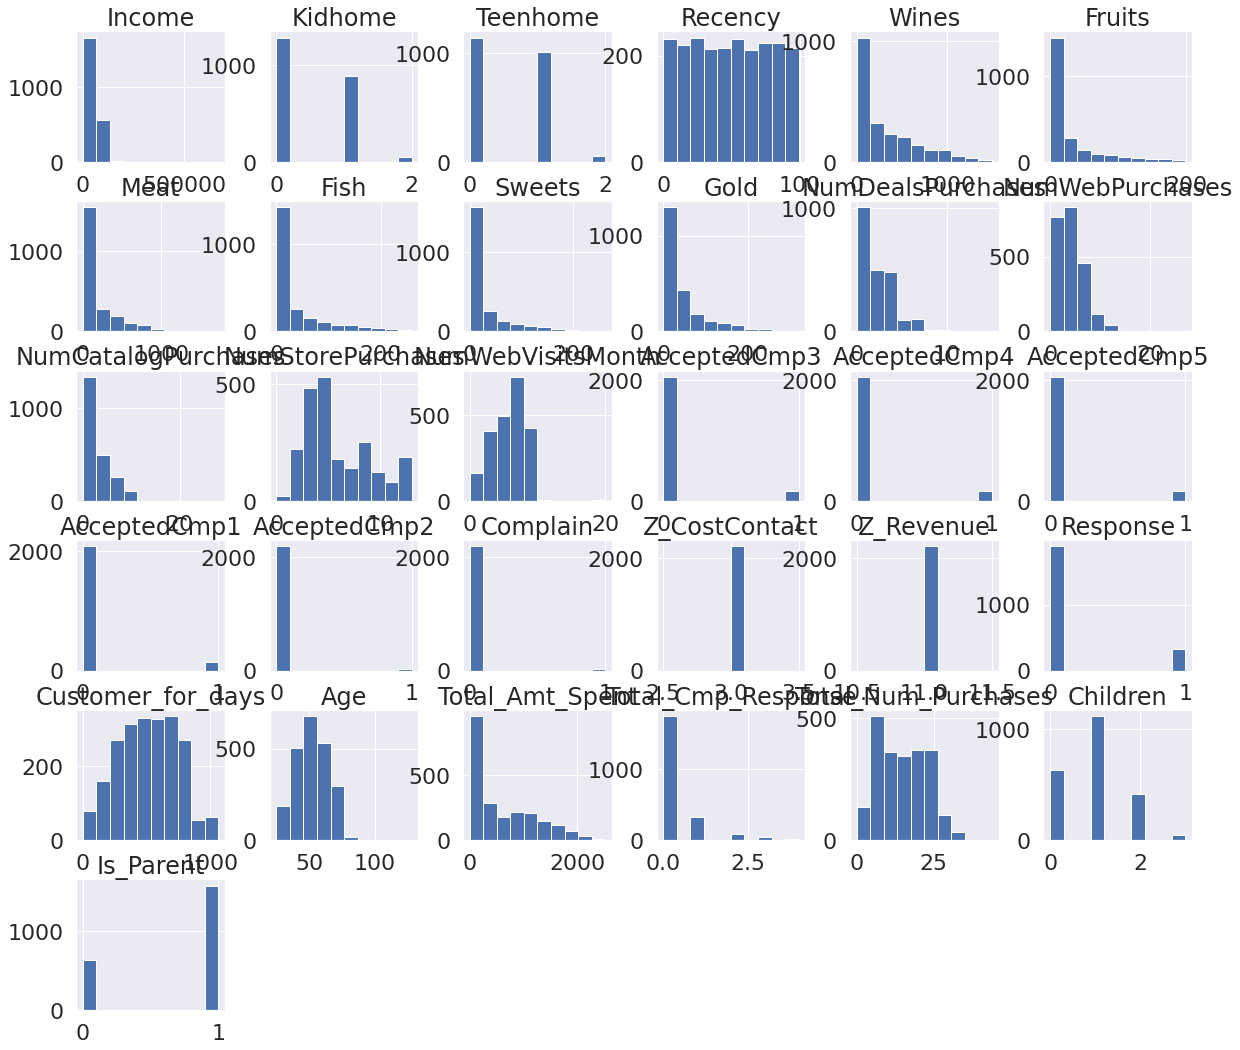

In [417]:
df.hist(figsize = (20, 18))

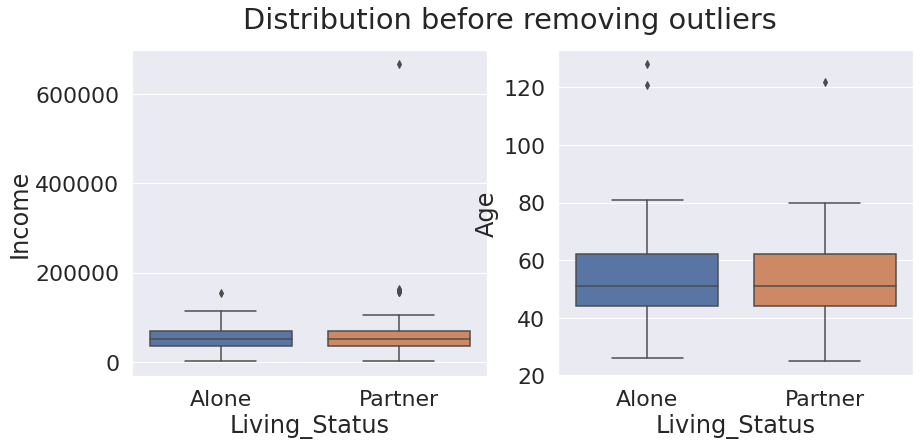

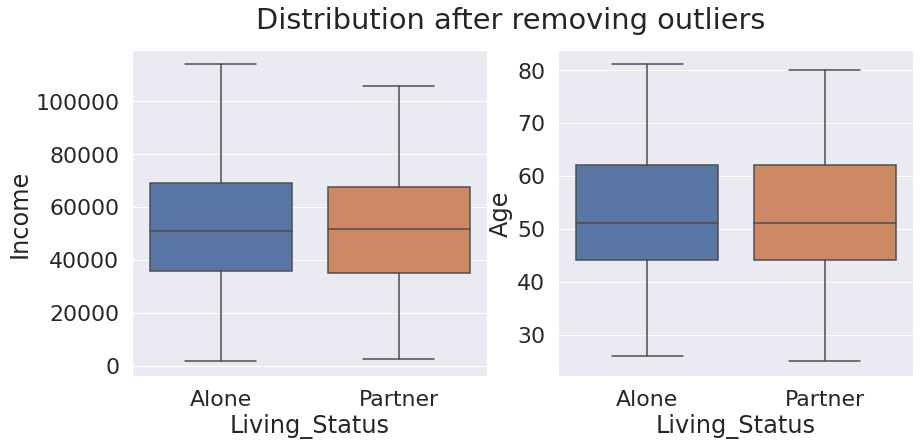

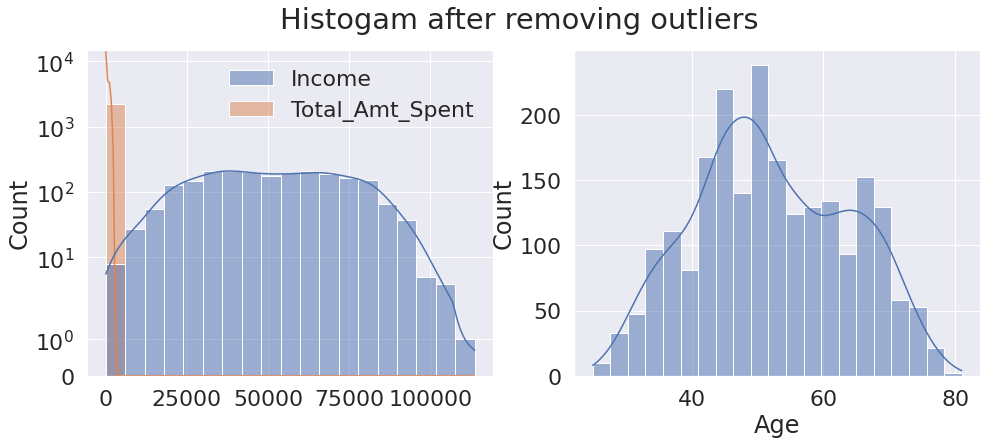

In [418]:
#Box plot shows that there exists outliers in two columns 
cols = ['Income','Age']
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
plt.suptitle("Distribution before removing outliers")
sns.boxplot(ax=axes[0], data = df, x='Living_Status', y='Income')
sns.boxplot(ax=axes[1], data = df, x='Living_Status', y='Age')
plt.show()

# Removing the outliers
def removeOutliers(data, col):
    Q3 = np.quantile(data[col], 0.75)
    Q1 = np.quantile(data[col], 0.25)
    IQR = Q3 - Q1
 
    lower_range = Q1 - 1.5 * IQR
    upper_range = Q3 + 1.5 * IQR
    
    data = data[~((data[col] < lower_range) | (data[col] > upper_range))]
    return data
    
df = removeOutliers(df, 'Income')
df = removeOutliers(df, 'Age')

#Box plot after removing outliers
cols = ['Income','Age']
fig, axes = plt.subplots(1, 2, figsize = (14, 6))
plt.suptitle("Distribution after removing outliers")
sns.boxplot(ax=axes[0], data = df, x='Living_Status', y='Income')
sns.boxplot(ax=axes[1], data = df, x='Living_Status', y='Age')
plt.show()

#Histogram plots for Income and Age
#Box plot after removing outliers
cols = ['Income','Age']
fig, axes = plt.subplots(1, 2, figsize = (16, 6))
plt.suptitle("Histogam after removing outliers")
sns.histplot(ax = axes[0], data = df[['Income', 'Total_Amt_Spent']], kde = True)
sns.histplot(ax = axes[1], data = df, x = 'Age', kde = True)
axes[0].set_yscale("symlog")
plt.show()

### Bivariate and Multivariate analysis
- Does one variable affect another, how are they related and do these relations drive customer behavior?

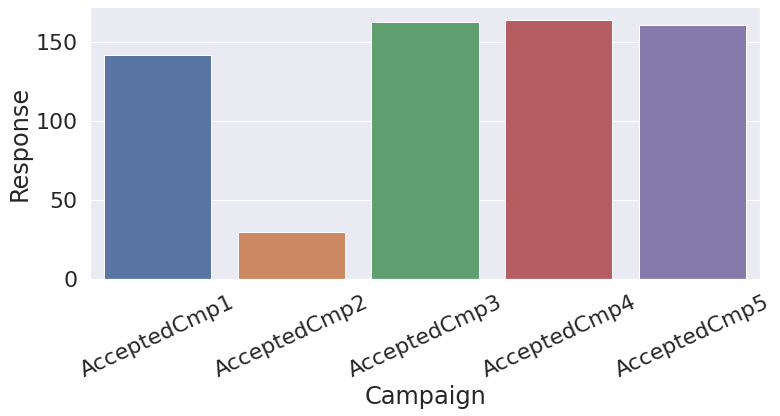

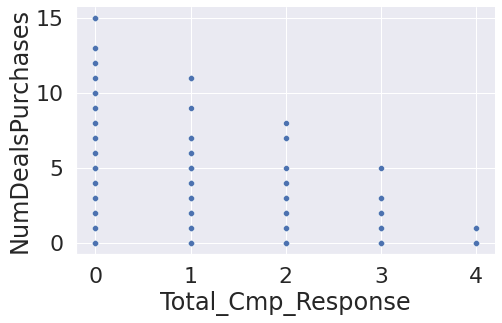

In [419]:
#Which campaigns were the most successful?
#create a dictionary that records the number of responses to each campaign
dict_cmp = {}
for cmp in ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']:
    dict_cmp[cmp] = df[cmp].sum()
data = pd.DataFrame(dict_cmp.items(), columns = ['Campaign', 'Response'])

#Plot the response values agains the campaign number
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(12, 5))
sns.barplot(data = data, x = "Campaign", y = "Response")
plt.xticks(rotation = 25)
plt.show()

#Is there a relation between the number of purchases and the campaigns?
sns.relplot(data=df, x="Total_Cmp_Response", y="NumDealsPurchases", aspect = 1.5)
plt.show()


How is education related to Income and spending?
percentage =  Graduate         50.476190
Postgraduate     38.095238
Undergraduate    11.428571
Name: Education, dtype: float64


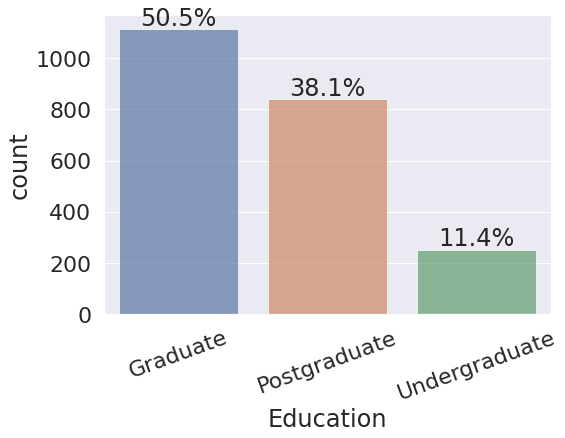

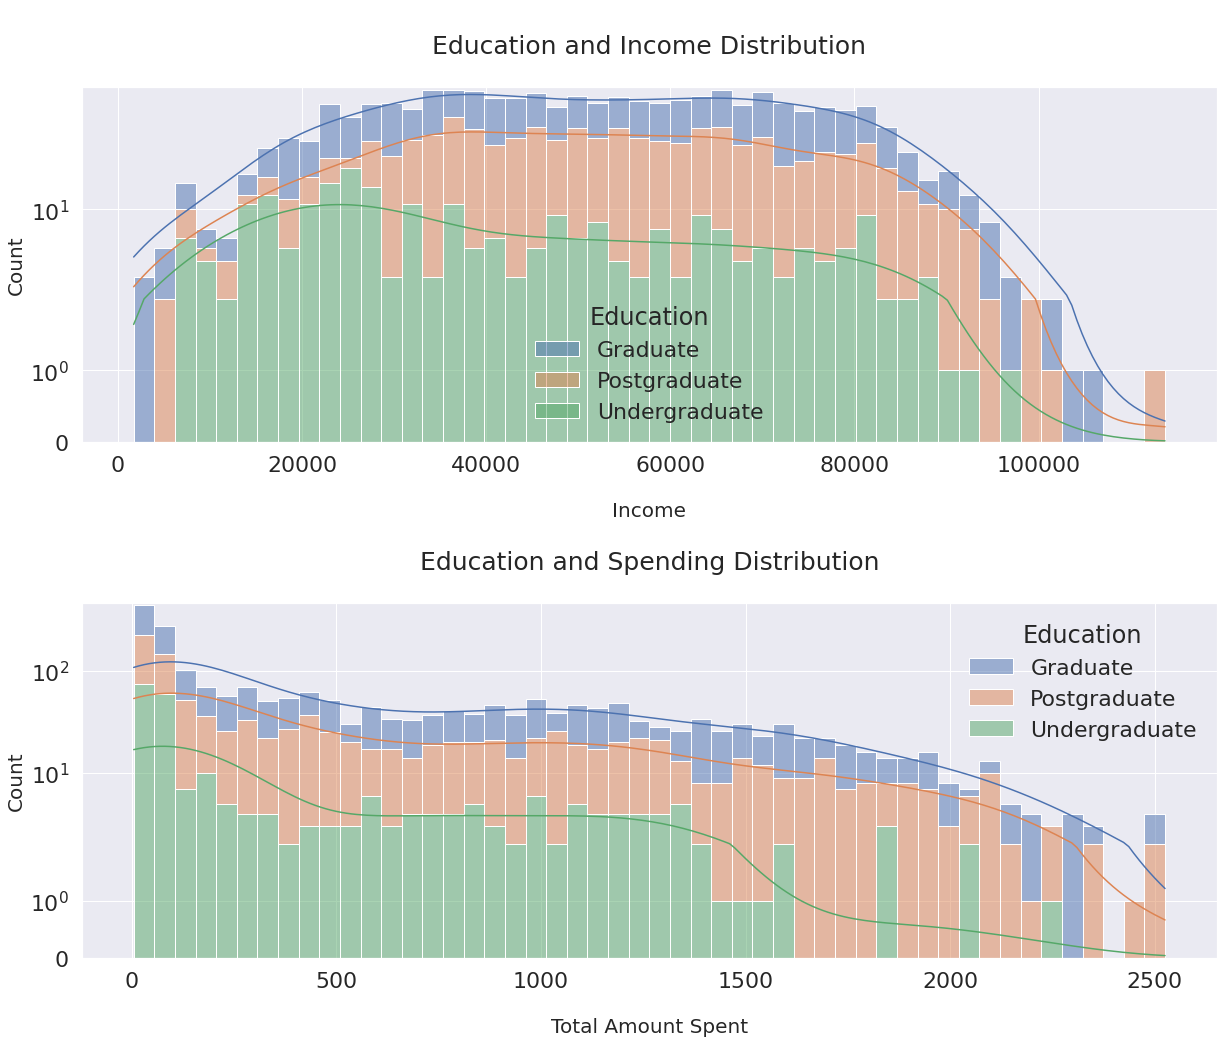

In [420]:
print('How is education related to Income and spending?')

#Education categories
ax = sns.countplot(x = 'Education', data = df, order = df['Education'].value_counts().index, alpha = 0.7)
percentage = 100*df['Education'].value_counts()/len(df)
print("percentage = ",percentage)
patches = ax.patches
for i in range(len(patches)):
    x = patches[i].get_x() + patches[i].get_width()/2
    y = patches[i].get_height()+15
    ax.annotate('{:.1f}%'.format(percentage[i]), (x, y), ha='center')
plt.xticks(rotation = 20)
plt.show()


fig, axes = plt.subplots(2, 1, figsize = (20, 16), sharex = False)
plt.tight_layout(pad = 5)

sns.histplot(data = df, x = "Income", hue = "Education", multiple = "stack", ax = axes[0], kde=True, bins = 50, fill = True)
axes[0].set_yscale("symlog")
axes[0].set_title("\nEducation and Income Distribution\n", fontsize = 25)
axes[0].set_ylabel("Count", fontsize = 20)
axes[0].set_xlabel("\nIncome", fontsize = 20)

sns.histplot(data = df, x = "Total_Amt_Spent", hue = "Education", multiple = "stack", ax = axes[1], kde=True, bins = 50, fill = True)
axes[1].set_yscale("symlog")
axes[1].set_title("\nEducation and Spending Distribution\n", fontsize = 25)
axes[1].set_ylabel("Count", fontsize = 20)
axes[1].set_xlabel("\nTotal Amount Spent", fontsize = 20)

plt.show()

How is family type related to Income and Spending?
percentage =  Partner    64.489796
Alone      35.510204
Name: Living_Status, dtype: float64


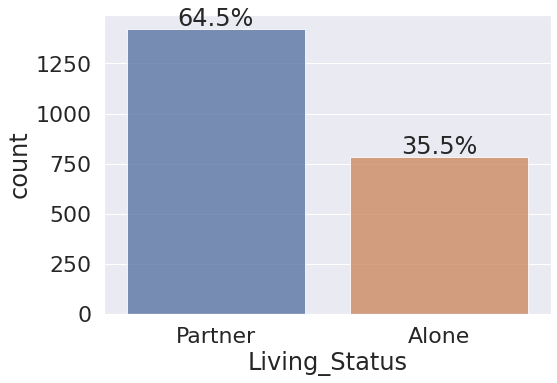

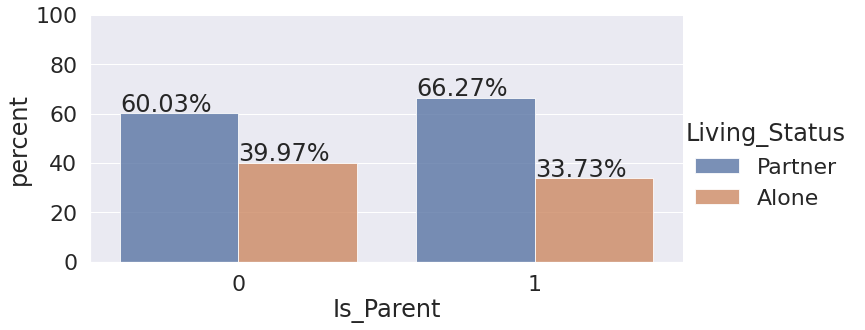

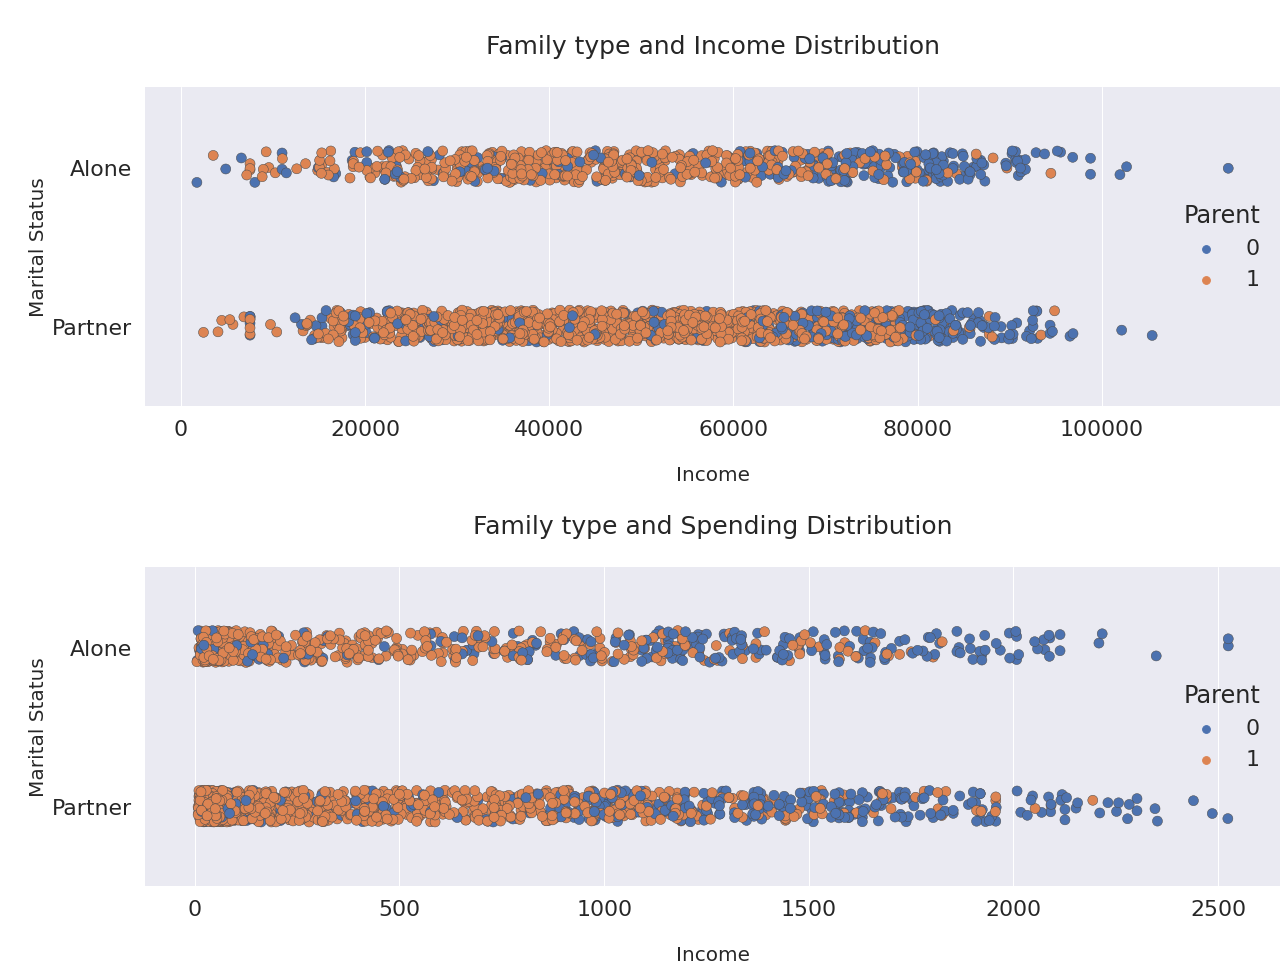

In [421]:
print('How is family type related to Income and Spending?')

#Living status categories
ax = sns.countplot(x = 'Living_Status', data = df, order = df['Living_Status'].value_counts().index, alpha = 0.8)
percentage = 100*df['Living_Status'].value_counts()/len(df)
print("percentage = ",percentage)
patches = ax.patches
for i in range(len(patches)):
    x = patches[i].get_x() + patches[i].get_width()/2
    y = patches[i].get_height()+15
    ax.annotate('{:.1f}%'.format(percentage[i]), (x, y), ha='center')
plt.show()


#Visualize two categories together
def cat_bar(x, y, df):
    df1 = df[[x, y]]
    df1 = df.groupby(x)[y].value_counts(normalize=True)
    df1 = df1.mul(100)
    df1 = df1.rename('percent').reset_index()
    g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1, aspect = 2, alpha = 0.8)
    g.ax.set_ylim(0,100)
    for p in g.ax.patches:
        txt = str(p.get_height().round(2)) + '%'
        txt_x = p.get_x() 
        txt_y = p.get_height()
        g.ax.text(txt_x,txt_y+1.0,txt)
    
y, x = 'Living_Status', 'Is_Parent'
cat_bar(x, y, df)

fig, axes = plt.subplots(2, 1, figsize = (20,15), sharex=False)
plt.tight_layout(pad = 5)

sns.stripplot(x = df["Income"], y = df["Living_Status"], hue = df["Is_Parent"], ax = axes[0], marker = "o", size = 10, linewidth = 0.5)
axes[0].legend(title = "Parent", loc = "center right")
axes[0].set_title("\nFamily type and Income Distribution\n",fontsize=25)
axes[0].set_xlabel("\nIncome",fontsize=20)
axes[0].set_ylabel("\nMarital Status",fontsize=20)

sns.stripplot(x = df["Total_Amt_Spent"], y = df["Living_Status"], hue = df["Is_Parent"], ax = axes[1], marker = "o", size = 10, linewidth = 0.5)
axes[1].legend(title = "Parent",loc = "center right")
axes[1].set_title("\nFamily type and Spending Distribution\n",fontsize=25)
axes[1].set_xlabel("\nIncome",fontsize=20)
axes[1].set_ylabel("\nMarital Status",fontsize=20)

sns.despine(left=True, bottom=True)
plt.show()

percentage =  1    50.430839
0    28.480726
2    18.820862
3     2.267574
Name: Children, dtype: float64


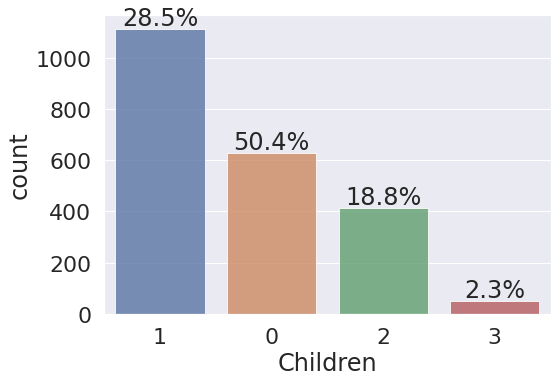

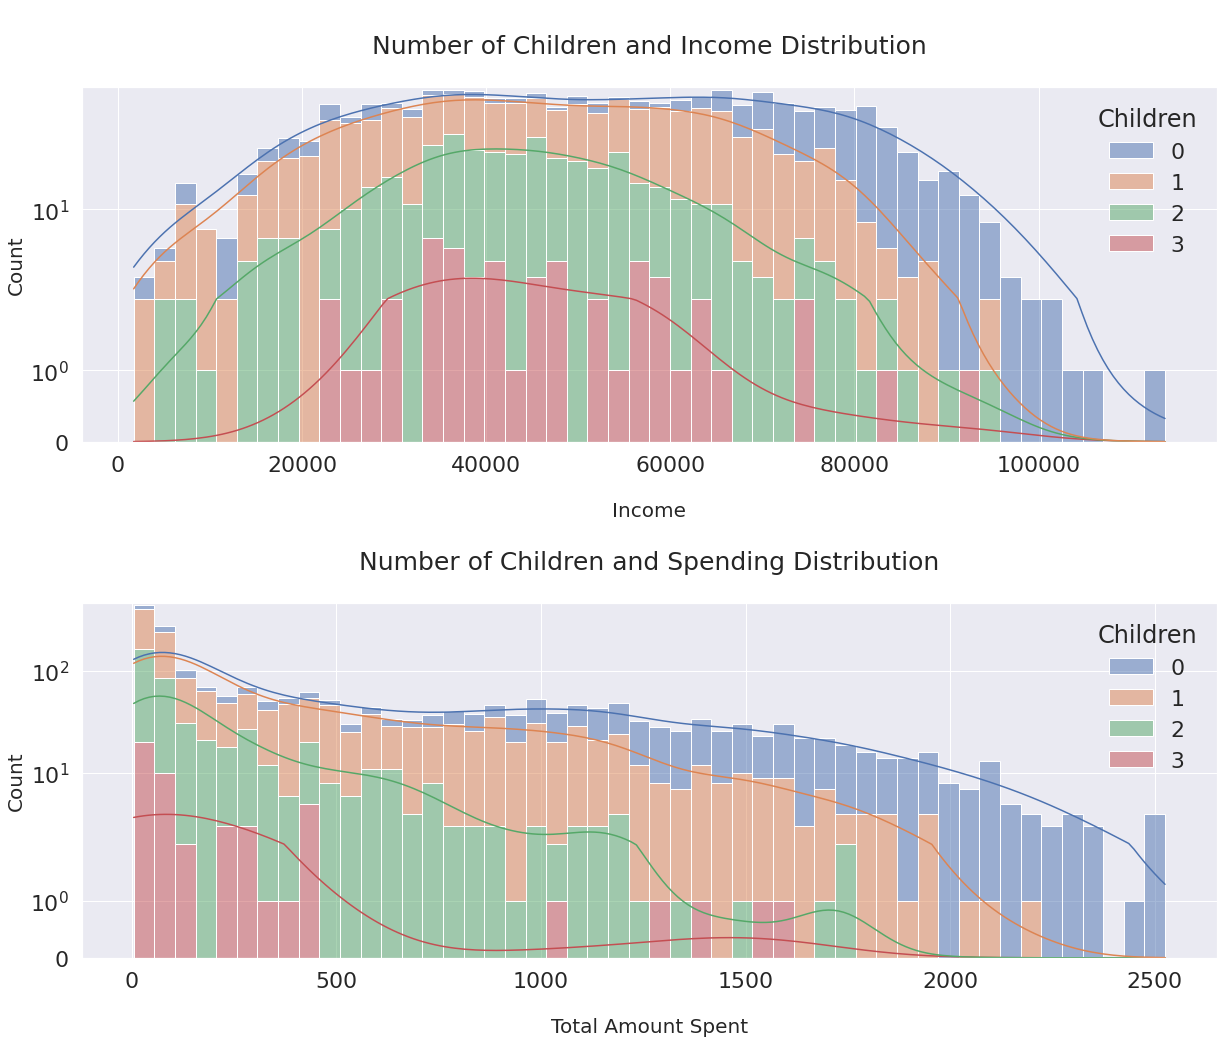

In [422]:
#Children
ax = sns.countplot(x = 'Children', data = df, order = df['Children'].value_counts().index, alpha = 0.8)
percentage = 100*df['Children'].value_counts()/len(df)
print("percentage = ",percentage)
patches = ax.patches
for i in range(len(patches)):
    x = patches[i].get_x() + patches[i].get_width()/2
    y = patches[i].get_height()+15
    ax.annotate('{:.1f}%'.format(percentage[i]), (x, y), ha='center')
plt.show()

fig, axes = plt.subplots(2, 1, figsize = (20, 16), sharex = False)
plt.tight_layout(pad = 5)
sns.histplot(data = df, x = "Income", hue = "Children", multiple = "stack", ax = axes[0], kde=True, bins = 50, fill = True, palette = sns.color_palette(n_colors = 4))
axes[0].set_yscale("symlog")
axes[0].set_title("\nNumber of Children and Income Distribution\n", fontsize = 25)
axes[0].set_ylabel("Count", fontsize = 20)
axes[0].set_xlabel("\nIncome", fontsize = 20)
sns.histplot(data = df, x = "Total_Amt_Spent", hue = "Children", multiple = "stack", ax = axes[1], kde=True, bins = 50, fill = True, palette = sns.color_palette(n_colors = 4))
axes[1].set_yscale("symlog")
axes[1].set_title("\nNumber of Children and Spending Distribution\n", fontsize = 25)
axes[1].set_ylabel("Count", fontsize = 20)
axes[1].set_xlabel("\nTotal Amount Spent", fontsize = 20)
plt.show()

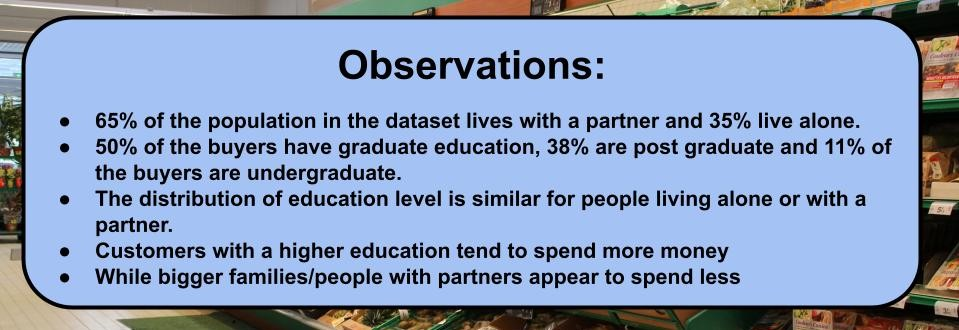

## Data Preprocessing
1. How to deal with categorical features? Two options: Ordinal and a One hot encoding
- The categorical features in the dataset can be ordinally encoded such as Education and Living status.
2. Numerical columns then need to be scaled using a Standard Scaler.

In [423]:
df_camp = df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].copy()
df.drop(columns = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Z_CostContact', 'Z_Revenue'], inplace = True)
print("Features being studied:\n", df.columns)

#Make a list of categorical columns
cat = []
for col in df.columns:
    if df[col].dtype == 'object':
        cat.append(col)
print("Categorical Columns are:",cat)
print("\nCategorical columns before transformation")
display(df[cat])

enc = OrdinalEncoder()
df[cat] = enc.fit_transform(df[cat])
print("Categorical columns after transformation")
display(df[cat])


Features being studied:
 Index(['Education', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'Wines',
       'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'Complain', 'Response', 'Customer_for_days', 'Age',
       'Living_Status', 'Total_Amt_Spent', 'Total_Cmp_Response',
       'Total_Num_Purchases', 'Children', 'Is_Parent'],
      dtype='object')
Categorical Columns are: ['Education', 'Living_Status']

Categorical columns before transformation


Education Living_Status
0         Graduate         Alone
1         Graduate         Alone
2         Graduate       Partner
3         Graduate       Partner
4     Postgraduate       Partner
...            ...           ...
2235      Graduate       Partner
2236  Postgraduate       Partner
2237      Graduate         Alone
2238  Postgraduate       Partner
2239  Postgraduate       Partner

[2205 rows x 2 columns]

Categorical columns after transformation


Education  Living_Status
0           0.0            0.0
1           0.0            0.0
2           0.0            1.0
3           0.0            1.0
4           1.0            1.0
...         ...            ...
2235        0.0            1.0
2236        1.0            1.0
2237        0.0            0.0
2238        1.0            1.0
2239        1.0            1.0

[2205 rows x 2 columns]

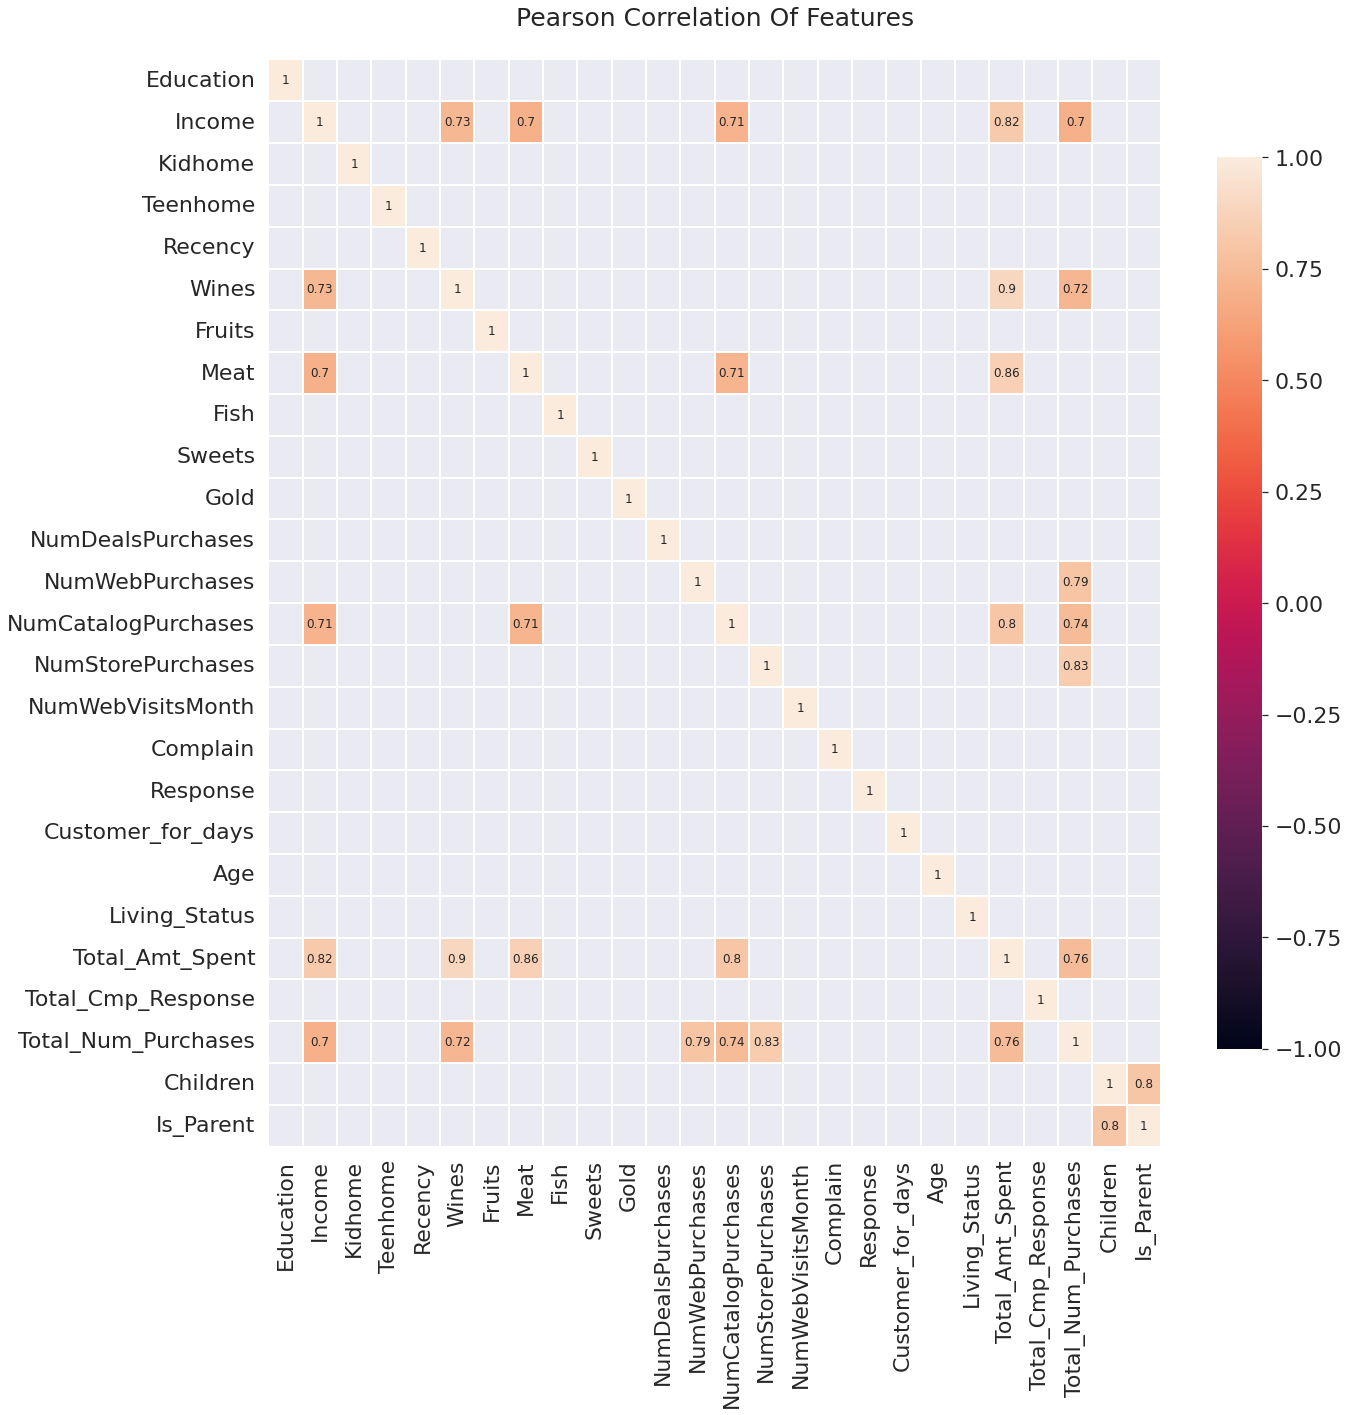

In [424]:
corr = df.corr()
kot = corr[(corr >= 0.7) | (corr <= -0.7)]
plt.subplots(figsize =(20, 20))
sns.heatmap(kot, cbar_kws=dict(shrink =.82), 
            annot=True, vmin=-1, vmax=1, linewidths=0.1,
            linecolor='white',annot_kws=dict(fontsize =12))
plt.title("Pearson Correlation Of Features\n", fontsize=25)
plt.xticks(rotation=90)
plt.show()


- Income is strongly correlated to:
   - Total amount spent
   - Total number of purchases
   - Catalog Purchases
   - Meat and Wine
- Total number of purchases is correlated to:
   - Web purchases
   - Catalog purchases
   - Store purchases

In [425]:
print("Summary before scaling")
display(df.describe())
#scaling features as a distance metric is used in the model
scaled_df = StandardScaler().fit_transform(df)

print("Summary after scaling")
display(pd.DataFrame(scaled_df, index = df.index, columns = df.columns).describe())

Summary before scaling


Education         Income      Kidhome     Teenhome      Recency  \
count  2205.000000    2205.000000  2205.000000  2205.000000  2205.000000   
mean      0.609524   51622.094785     0.442177     0.506576    49.009070   
std       0.683219   20713.063826     0.537132     0.544380    28.932111   
min       0.000000    1730.000000     0.000000     0.000000     0.000000   
25%       0.000000   35196.000000     0.000000     0.000000    24.000000   
50%       0.000000   51287.000000     0.000000     0.000000    49.000000   
75%       1.000000   68281.000000     1.000000     1.000000    74.000000   
max       2.000000  113734.000000     2.000000     2.000000    99.000000   

             Wines       Fruits         Meat         Fish       Sweets  ...  \
count  2205.000000  2205.000000  2205.000000  2205.000000  2205.000000  ...   
mean    306.164626    26.403175   165.312018    37.756463    27.128345  ...   
std     337.493839    39.784484   217.784507    54.824635    41.130468  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%      24.000000     2.000000    16.000000     3.000000     1.000000  ...   
50%     178.000000     8.000000    68.000000    12.000000     8.000000  ...   
75%     507.000000    33.000000   232.000000    50.000000    34.000000  ...   
max    1493.000000   199.000000  1725.000000   259.000000   262.000000  ...   

          Complain    Response  Customer_for_days          Age  Living_Status  \
count  2205.000000  2205.00000        2205.000000  2205.000000    2205.000000   
mean      0.009070     0.15102         512.062585    52.095692       0.644898   
std       0.094827     0.35815         232.528808    11.705801       0.478653   
min       0.000000     0.00000           0.000000    25.000000       0.000000   
25%       0.000000     0.00000         340.000000    44.000000       0.000000   
50%       0.000000     0.00000         513.000000    51.000000       1.000000   
75%       0.000000     0.00000         686.000000    62.000000       1.000000   
max       1.000000     1.00000        1063.000000    81.000000       1.000000   

       Total_Amt_Spent  Total_Cmp_Response  Total_Num_Purchases     Children  \
count      2205.000000          2205.00000          2205.000000  2205.000000   
mean        606.821769             0.29932            14.887982     0.948753   
std         601.675284             0.68044             7.615277     0.749231   
min           5.000000             0.00000             0.000000     0.000000   
25%          69.000000             0.00000             8.000000     0.000000   
50%         397.000000             0.00000            15.000000     1.000000   
75%        1047.000000             0.00000            21.000000     1.000000   
max        2525.000000             4.00000            43.000000     3.000000   

         Is_Parent  
count  2205.000000  
mean      0.715193  
std       0.451425  
min       0.000000  
25%       0.000000  
50%       1.000000  
75%       1.000000  
max       1.000000  

[8 rows x 26 columns]

Summary after scaling


Education        Income       Kidhome      Teenhome       Recency  \
count  2.205000e+03  2.205000e+03  2.205000e+03  2.205000e+03  2.205000e+03   
mean   3.091505e-17  1.237672e-17 -1.483318e-16  6.822459e-16  6.968475e-17   
std    1.000227e+00  1.000227e+00  1.000227e+00  1.000227e+00  1.000227e+00   
min   -8.923382e-01 -2.409272e+00 -8.234051e-01 -9.307668e-01 -1.694318e+00   
25%   -8.923382e-01 -7.932106e-01 -8.234051e-01 -9.307668e-01 -8.646014e-01   
50%   -8.923382e-01 -1.618161e-02 -8.234051e-01 -9.307668e-01 -3.135738e-04   
75%    5.716542e-01  8.044529e-01  1.038757e+00  9.066018e-01  8.639742e-01   
max    2.035647e+00  2.999363e+00  2.900920e+00  2.743970e+00  1.728262e+00   

              Wines        Fruits          Meat          Fish        Sweets  \
count  2.205000e+03  2.205000e+03  2.205000e+03  2.205000e+03  2.205000e+03   
mean  -2.754159e-17  4.823554e-17  2.001422e-17 -3.479202e-17  2.854859e-17   
std    1.000227e+00  1.000227e+00  1.000227e+00  1.000227e+00  1.000227e+00   
min   -9.073768e-01 -6.638056e-01 -7.592345e-01 -6.888332e-01 -6.597177e-01   
25%   -8.362482e-01 -6.135234e-01 -6.857507e-01 -6.341008e-01 -6.353993e-01   
50%   -3.798401e-01 -4.626766e-01 -4.469284e-01 -4.699038e-01 -4.651706e-01   
75%    5.952136e-01  1.658516e-01  3.062803e-01  2.233725e-01  1.671076e-01   
max    3.517411e+00  4.339279e+00  7.163236e+00  4.036392e+00  5.711701e+00   

       ...      Complain      Response  Customer_for_days           Age  \
count  ...  2.205000e+03  2.205000e+03       2.205000e+03  2.205000e+03   
mean   ...  3.492293e-16  1.270840e-16      -1.732049e-16  1.447066e-16   
std    ...  1.000227e+00  1.000227e+00       1.000227e+00  1.000227e+00   
min    ... -9.567297e-02 -4.217637e-01      -2.202646e+00 -2.315248e+00   
25%    ... -9.567297e-02 -4.217637e-01      -7.401303e-01 -6.917534e-01   
50%    ... -9.567297e-02 -4.217637e-01       4.032307e-03 -9.362368e-02   
75%    ... -9.567297e-02 -4.217637e-01       7.481949e-01  8.462945e-01   
max    ...  1.045227e+01  2.370996e+00       2.369867e+00  2.469790e+00   

       Living_Status  Total_Amt_Spent  Total_Cmp_Response  \
count   2.205000e+03     2.205000e+03        2.205000e+03   
mean   -2.215411e-18    -1.495402e-17        5.012367e-16   
std     1.000227e+00     1.000227e+00        1.000227e+00   
min    -1.347625e+00    -1.000470e+00       -4.399912e-01   
25%    -1.347625e+00    -8.940766e-01       -4.399912e-01   
50%     7.420464e-01    -3.488084e-01       -4.399912e-01   
75%     7.420464e-01     7.317536e-01       -4.399912e-01   
max     7.420464e-01     3.188785e+00        5.439891e+00   

       Total_Num_Purchases      Children     Is_Parent  
count         2.205000e+03  2.205000e+03  2.205000e+03  
mean         -4.430822e-18  1.447066e-16 -1.369527e-16  
std           1.000227e+00  1.000227e+00  1.000227e+00  
min          -1.955459e+00 -1.266589e+00 -1.584660e+00  
25%          -9.047005e-01 -1.266589e+00 -1.584660e+00  
50%           1.471300e-02  6.841520e-02  6.310503e-01  
75%           8.027817e-01  6.841520e-02  6.310503e-01  
max           3.692367e+00  2.738424e+00  6.310503e-01  

[8 rows x 26 columns]

### Dimensionality Reduction

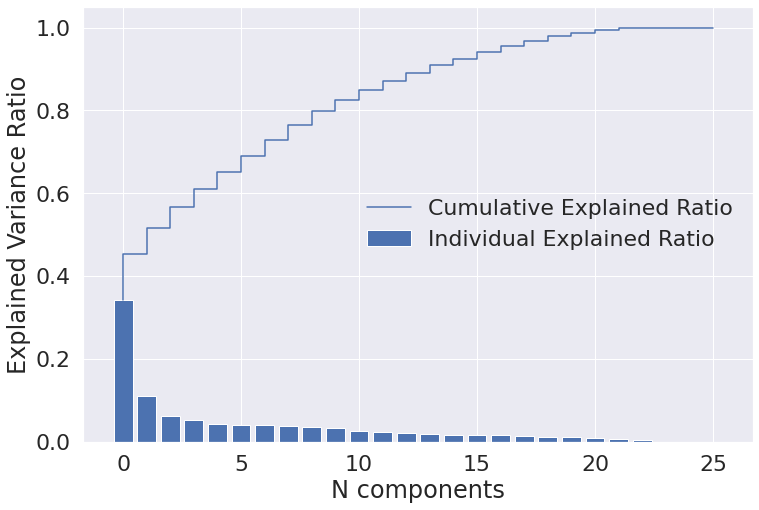

In [426]:
pca = PCA()
pca.fit(scaled_df)

cum_sum_eigenvalues = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(12, 8))
plt.bar(range(0, len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_, label="Individual Explained Ratio")
plt.step(range(0, len(cum_sum_eigenvalues)), cum_sum_eigenvalues, label="Cumulative Explained Ratio")
plt.xlabel("N components")
plt.ylabel("Explained Variance Ratio")
plt.legend(loc="best")
plt.show()

### Visualize data in the reduced dimensions

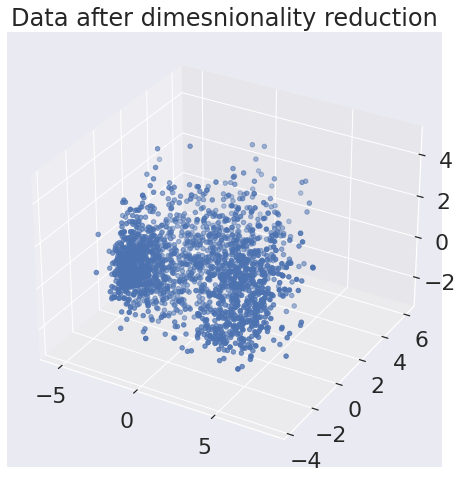

In [427]:
pca = PCA(n_components = 3)
df_pca = pd.DataFrame(pca.fit_transform(scaled_df), columns=["PC1", "PC2", "PC3"])

#A 3D Projection Of Data In The Reduced Dimension
x = df_pca["PC1"]
y = df_pca["PC2"]
z = df_pca["PC3"]
#To plot
fig = plt.figure(figsize = (10, 8))
ax = fig.add_subplot(111, projection = "3d")
ax.scatter(x,y,z, marker = "o" )
ax.set_title("Data after dimesnionality reduction")
plt.show()

### Selecting K using Elbow Method 
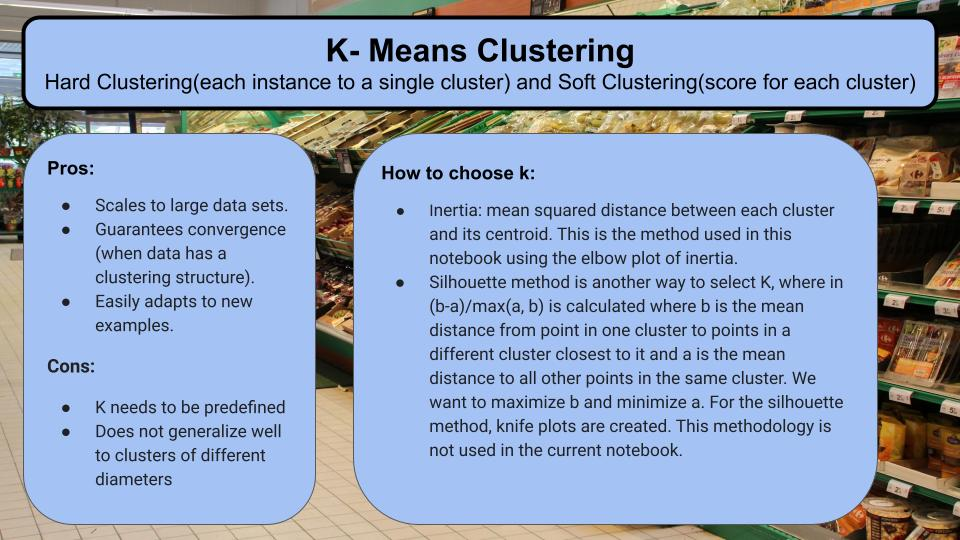

Principal Components: ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8']


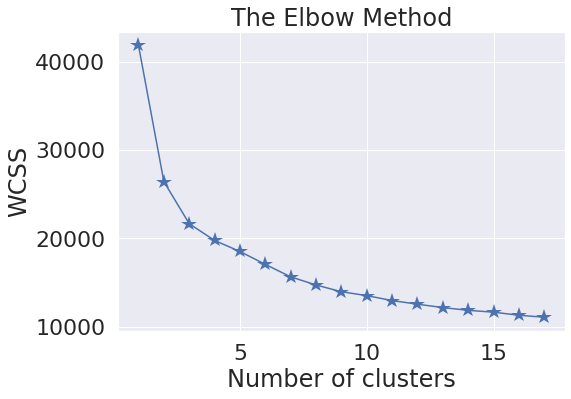

In [445]:
pca = PCA(n_components = 8)
lab_comp = []
for i in range(1, 9):
    lab_comp.append(f"PC{i}")
print("Principal Components:", lab_comp)
df_pca = pd.DataFrame(pca.fit_transform(scaled_df), columns = lab_comp)


#Using the elbow method to K
cluster_inertia = []
for i in range(1, 18):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 50, n_init = 10)
    kmeans.fit(df_pca)
    cluster_inertia.append(kmeans.inertia_)
plt.plot(range(1, 18), cluster_inertia , marker = '*', markersize = 16)
plt.title('The Elbow Method') 
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### 4 clusters seem like a reasonable choice
- Clusters appear fairly distributed among the customers.

In [449]:
kmeans = KMeans(n_clusters = 4, random_state = 42, n_init = 10)
# ac = AgglomerativeClustering(n_clusters=4)

y_cluster = kmeans.fit_predict(df_pca)
df_pca["Clusters"] = y_cluster
df["Clusters"]= y_cluster


## Cluster analysis

percentage =  0    27.120181
2    25.487528
3    24.353741
1    23.038549
Name: Clusters, dtype: float64


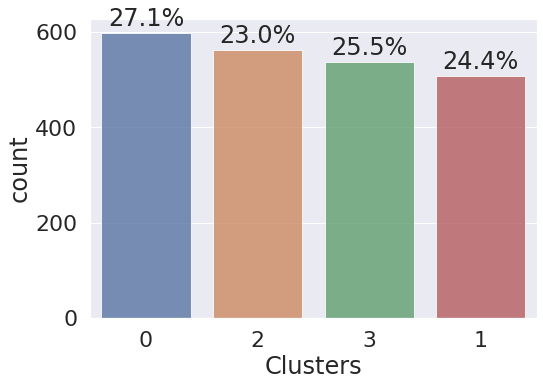

In [450]:
#clustercategories
ax = sns.countplot(x = 'Clusters', data = df, order = df['Clusters'].value_counts().index, alpha = 0.8)
percentage = 100*df['Clusters'].value_counts()/len(df)
print("percentage = ",percentage)
patches = ax.patches
for i in range(len(patches)):
    x = patches[i].get_x() + patches[i].get_width()/2
    y = patches[i].get_height()+15
    ax.annotate('{:.1f}%'.format(percentage[i]), (x, y), ha='center')
plt.show()

### Income and Spending for each cluster

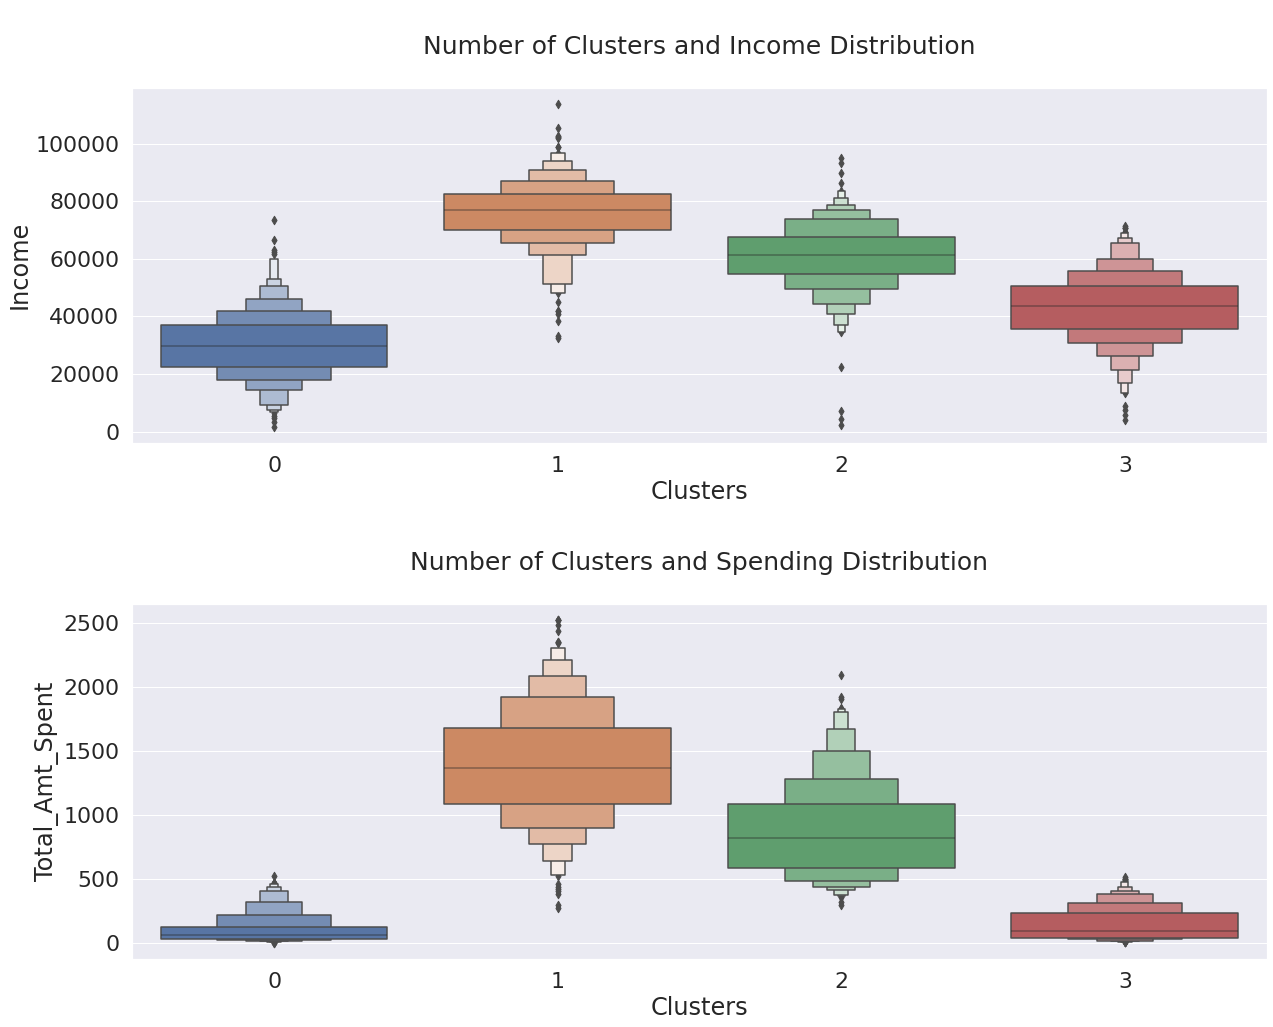

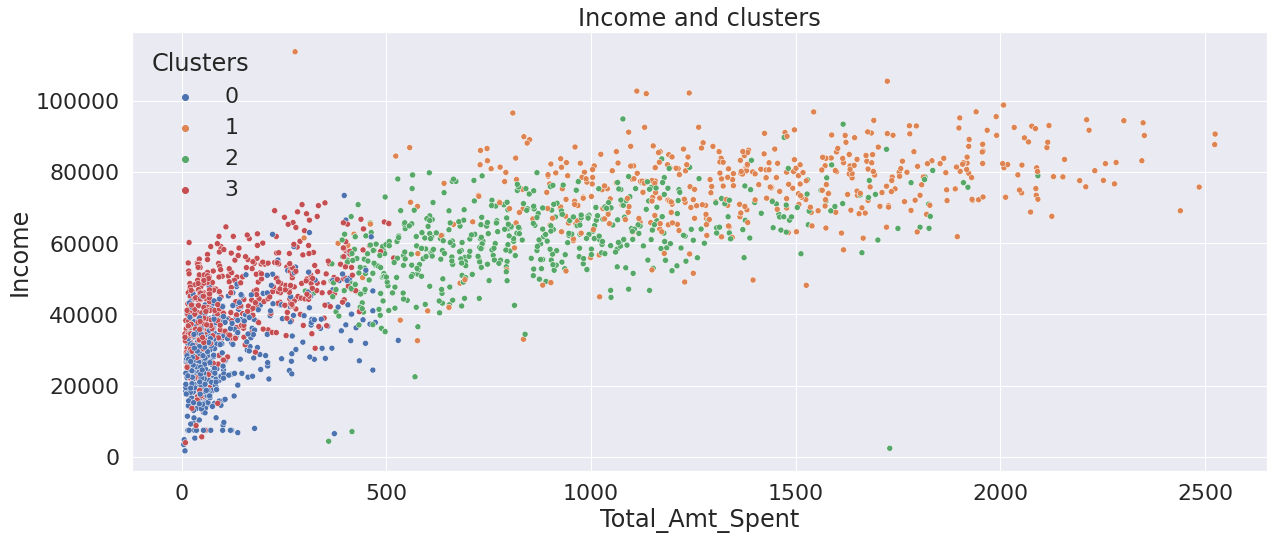

In [451]:
fig, axes = plt.subplots(2, 1, figsize = (20, 16), sharex = False)
plt.tight_layout(pad = 5)
sns.boxenplot(x = df["Clusters"], y = df["Income"], ax = axes[0])
axes[0].set_title("\nNumber of Clusters and Income Distribution\n", fontsize = 25)
sns.boxenplot(x = df["Clusters"], y = df["Total_Amt_Spent"], ax = axes[1])
axes[1].set_title("\nNumber of Clusters and Spending Distribution\n", fontsize = 25)
plt.show()


fig, axes = plt.subplots(figsize = (20, 10), sharex = False)
plt.tight_layout(pad = 5)
sns.scatterplot(data = df, x = "Total_Amt_Spent", y = "Income", hue = "Clusters", ax = axes, palette = sns.color_palette(n_colors = 4))
axes.set_title("Income and clusters")
plt.show()

- Cluster 0 customers income range is in between 5000 to 60,000 and spending range is in between 0 to 500.

- Cluster 1 customers income range is in between 50,000 to 110,000 and spending range is in between 400 to 2500.

- Cluster 2 customers income range is in between 40,000 to 80,000 and spending range is in between 270 to 1800.

- Cluster 3 customers income range is in between 18,000 to 70,000 and spending range is in between 0 to 500.

### Clusters and Promotion accepted

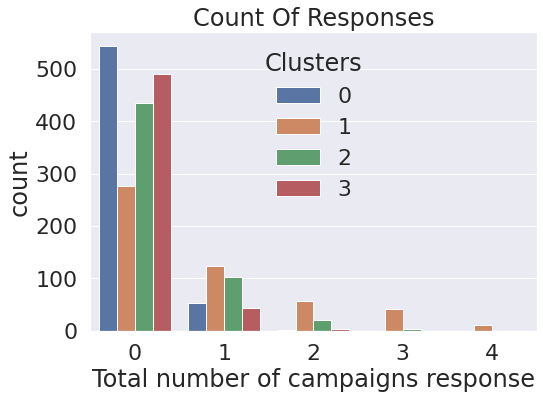

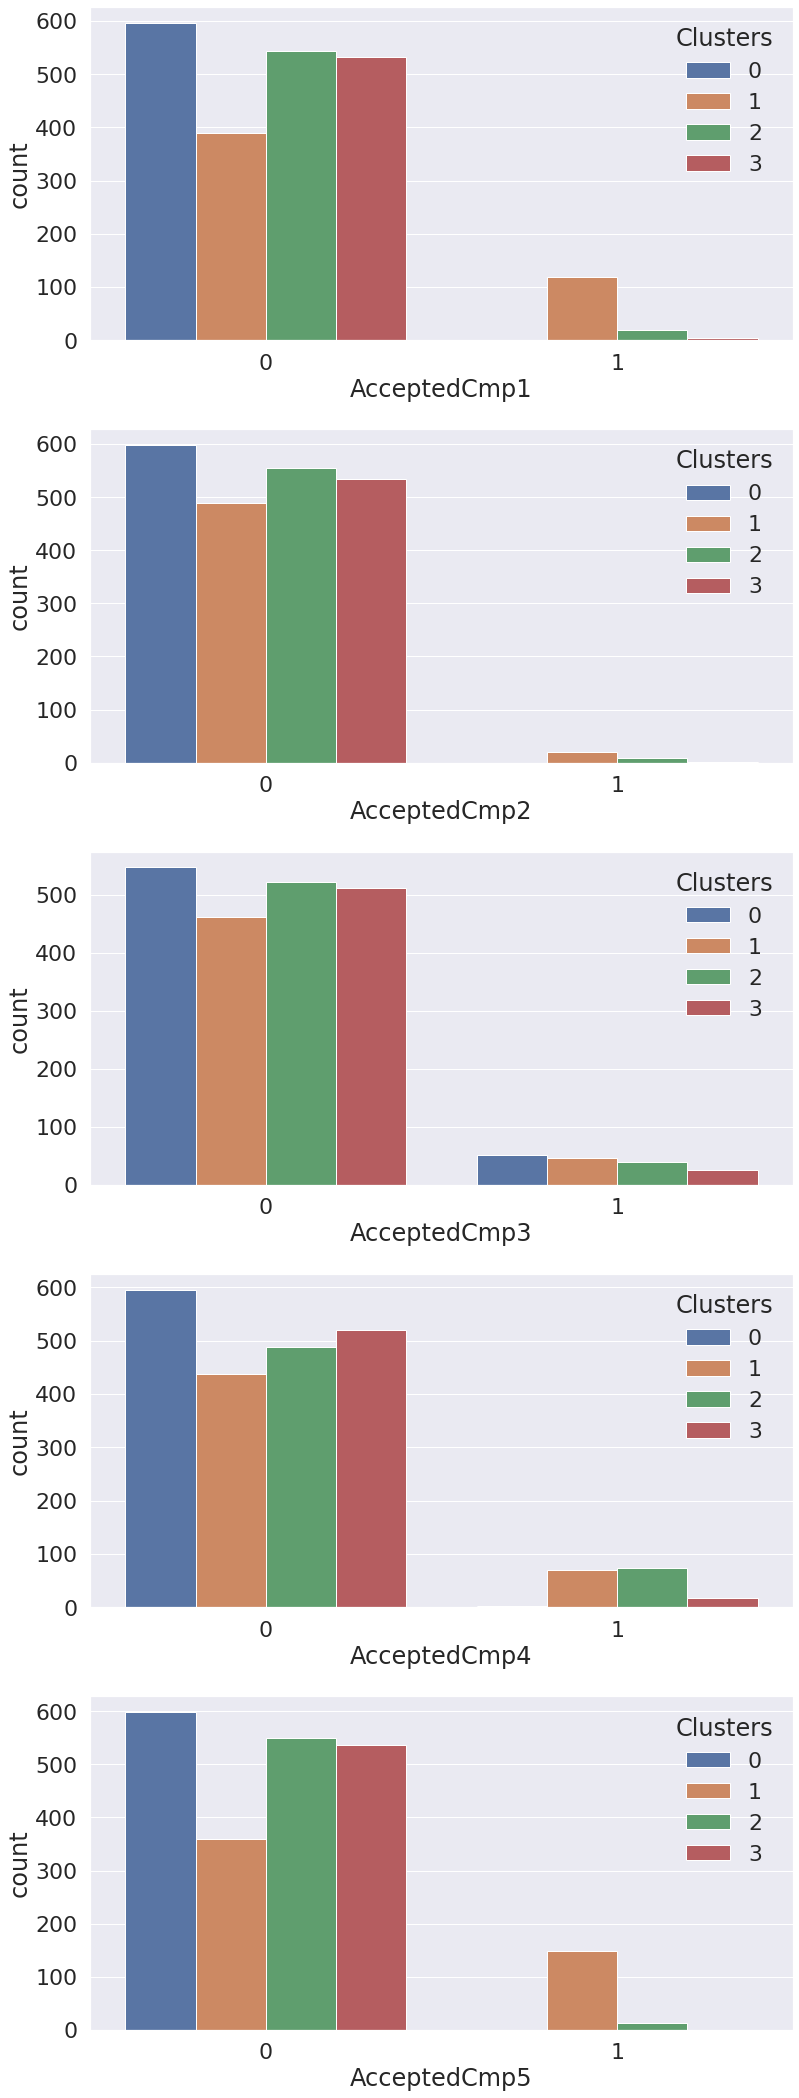

In [452]:
#Promotions that worked
plt.figure()
pl = sns.countplot(x = df["Total_Cmp_Response"],hue = df["Clusters"])
pl.set_title("Count Of Responses")
pl.set_xlabel("Total number of campaigns response")
plt.show()

df_camp['Clusters'] = df['Clusters']
fig, axes = plt.subplots(5, 1, figsize = (12, 30))
plt.tight_layout(pad = 2)
for i, cmp in zip(range(5), range(1, 6)):
    sns.countplot(data = df_camp, x = f"AcceptedCmp{cmp}", hue =  "Clusters", ax = axes[i])
plt.show()

- Cluster 1 is mostly likley to respond to campaigns

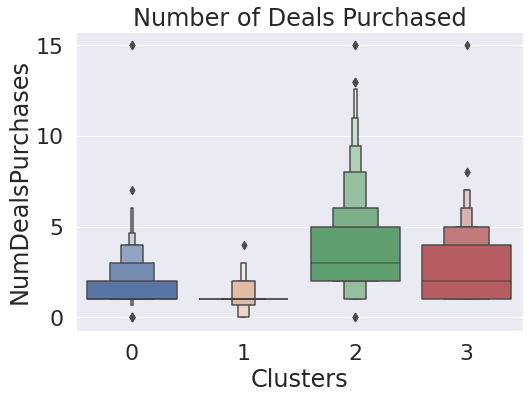

In [453]:
#Plotting the number of deals purchased
plt.figure()
pl = sns.boxenplot(y = df["NumDealsPurchases"], x = df["Clusters"])
pl.set_title("Number of Deals Purchased")
plt.show()

- Cluster 2 and Cluster 3 responded well to deals offered.

### Digging deeper into cluster profiles

In [454]:
df.columns

Index(['Education', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'Wines',
       'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'Complain', 'Response', 'Customer_for_days', 'Age',
       'Living_Status', 'Total_Amt_Spent', 'Total_Cmp_Response',
       'Total_Num_Purchases', 'Children', 'Is_Parent', 'Clusters'],
      dtype='object')

/usr/lib/python3/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


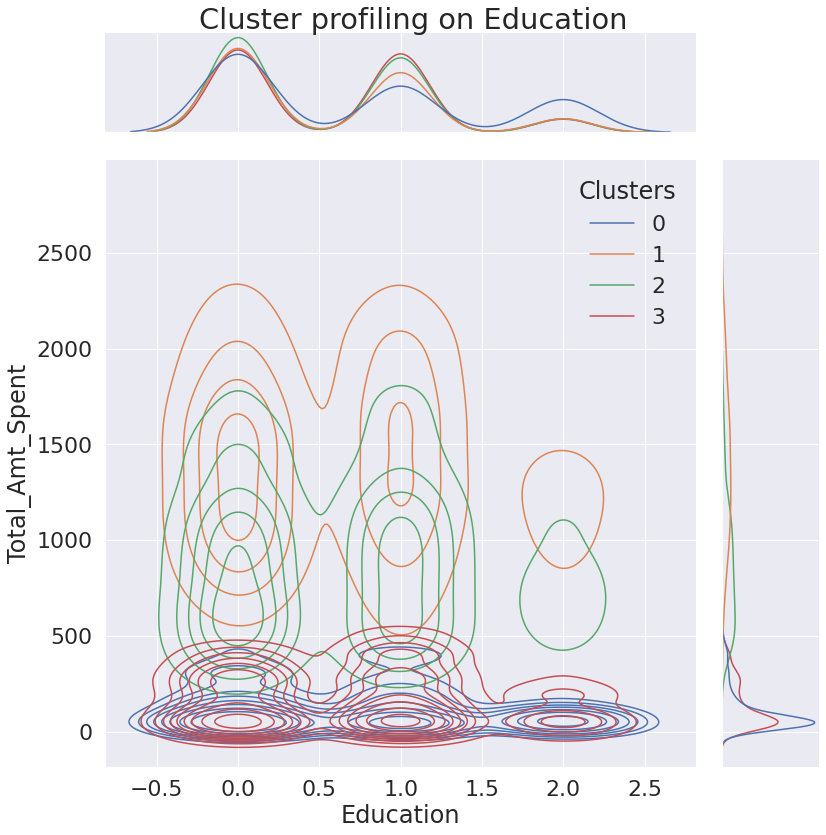

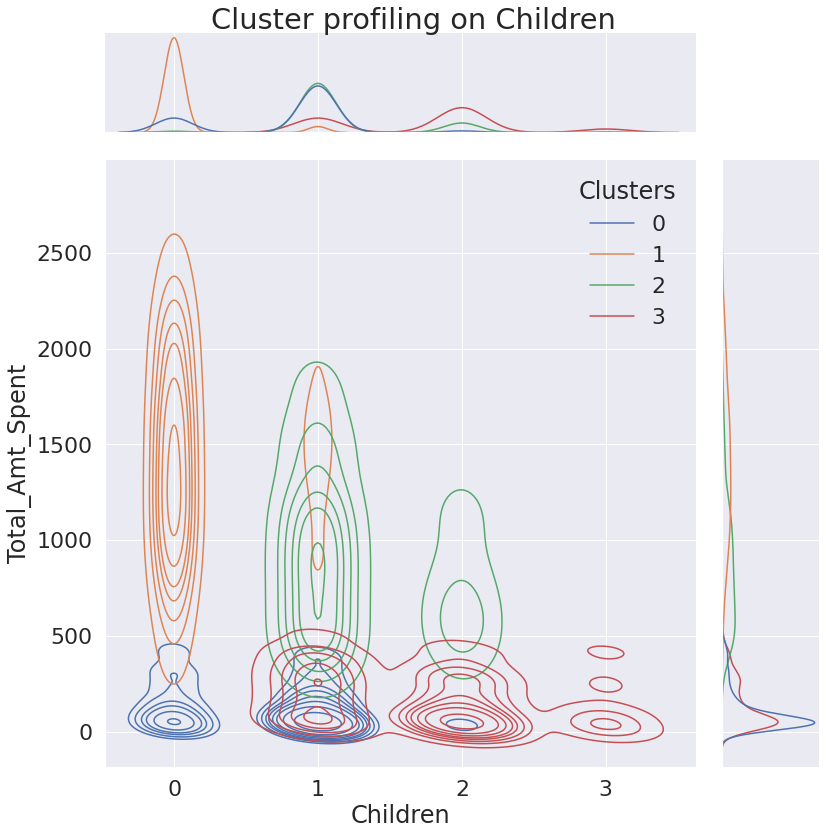

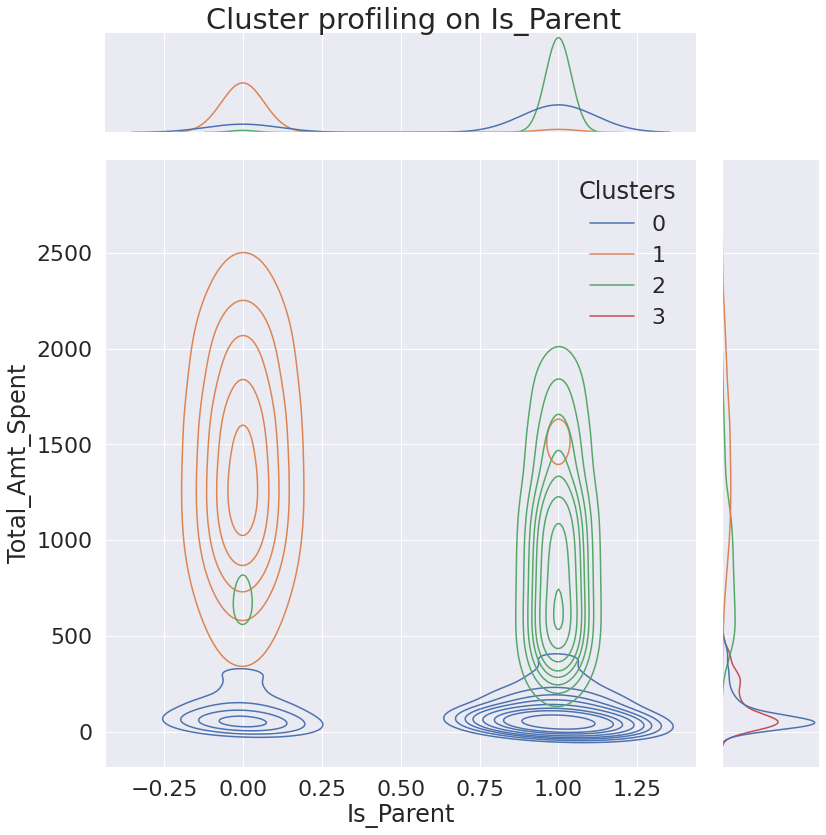

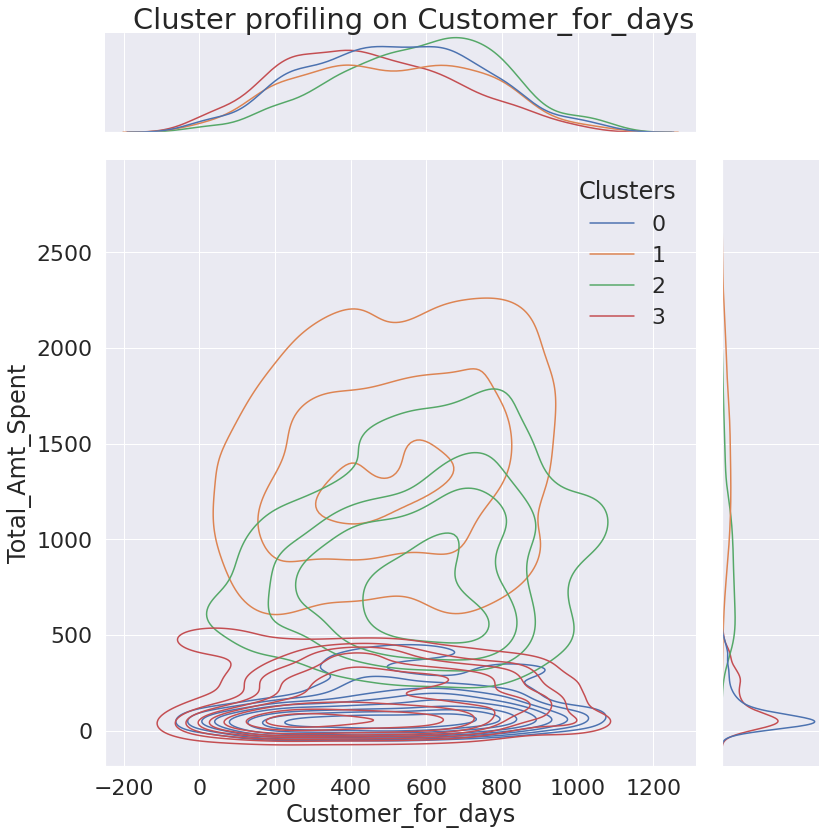

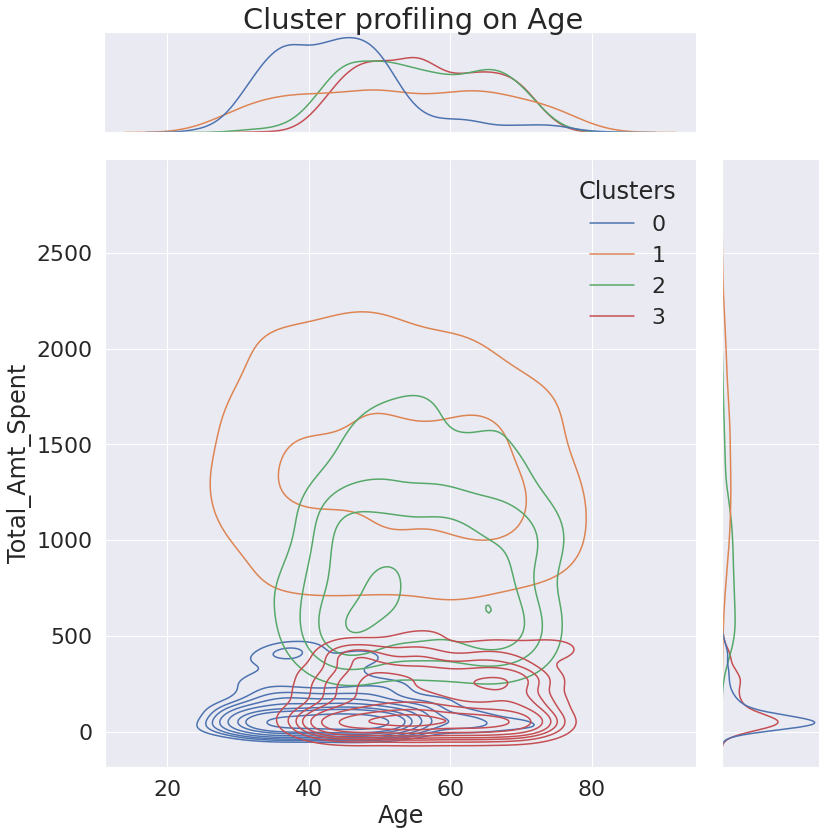

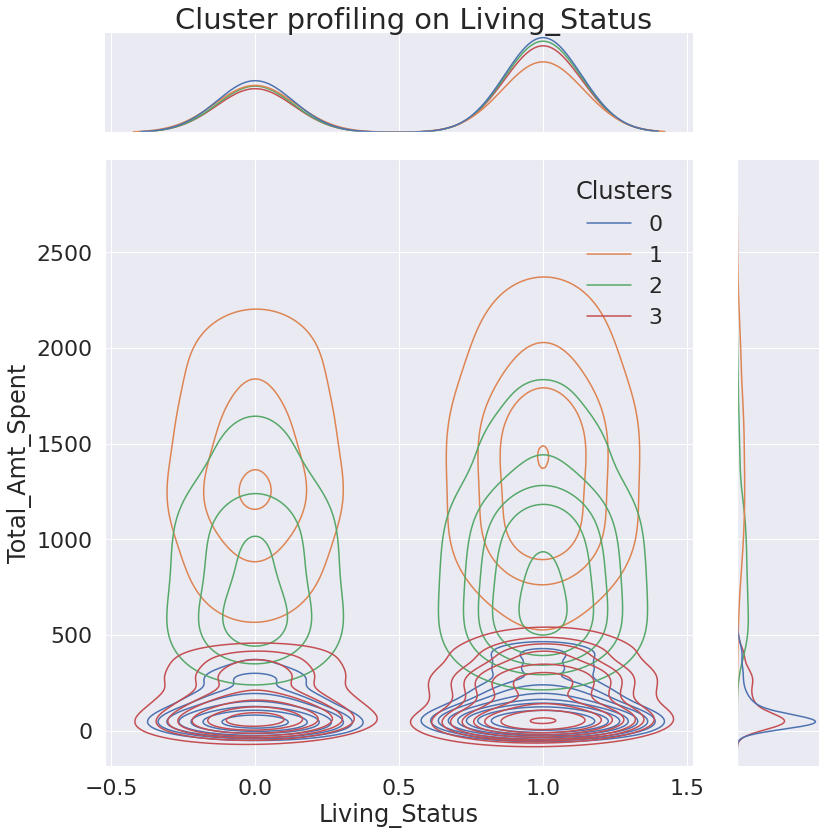

In [456]:
def profiling(col):
    #sns.kdeplot(x = df[col], y = df["Total_Amt_Spent"], hue = df["Clusters"], palette = sns.color_palette(n_colors = 4))
    p = sns.jointplot(x = df[col], y = df["Total_Amt_Spent"], hue = df["Clusters"], kind = "kde", palette = sns.color_palette(n_colors = 4), height = 12) 
    p.fig.suptitle(f"Cluster profiling on {col}")
    p.ax_joint.collections[0].set_alpha(0)
    p.fig.tight_layout()
    p.fig.subplots_adjust(top=0.95) # Reduce plot to make room 
    

for col in ['Education', 'Children', 'Is_Parent', 'Customer_for_days', 'Age', 'Living_Status']:
    profiling(col)

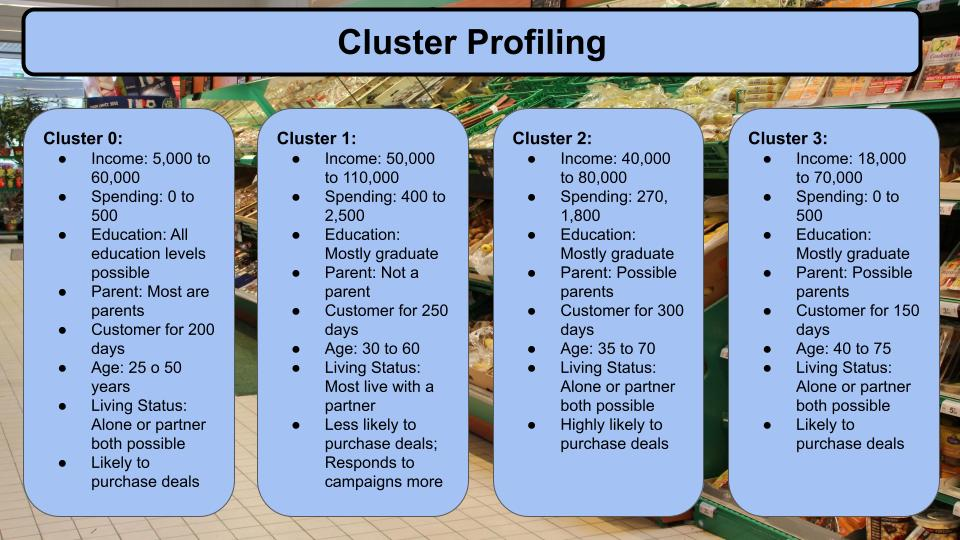